<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/NLP/%D0%93%D0%BB%D0%B0%D0%B2%D0%B0_3_%D0%9C%D0%B5%D1%82%D0%BE%D0%B4%D0%B8%D0%BA%D0%B8_%D0%BF%D0%BE%D0%BD%D0%B8%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F_%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B8(PCA%2C_SVD%2C_LSA%2C_t_SNE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Метод главных компонент (PCA)

## Введение

Метод главных компонент (PCA, Principal Component Analysis) — это техника снижения размерности, которая используется для преобразования исходного набора данных с высоким количеством признаков (фичей) в новый набор данных с меньшей размерностью, сохраняя при этом основную информацию о данных. PCA особенно полезен в задачах обработки естественного языка (NLP), где текстовые данные представляют собой векторы высокой размерности.

Основная цель PCA в NLP — это уменьшение количества признаков (например, слов или n-грамм), что упрощает последующую обработку и повышает эффективность машинного обучения. При этом необходимо сохранить как можно больше информации о различиях между текстами.

### Задачи PCA в NLP:
- Снижение размерности векторов текстов (например, после использования методов векторизации, таких как TF-IDF или word2vec).
- Ускорение обучения моделей машинного обучения.
- Избежание переобучения за счёт уменьшения количества признаков.
- Визуализация текстовых данных.

## Основные концепции PCA

Метод главных компонент опирается на математическое преобразование исходных данных в новое пространство с помощью линейных комбинаций исходных признаков. Эти линейные комбинации называются **главными компонентами**.

### Математическая формализация PCA

PCA может быть описан как задача поиска новых ортогональных базисов для набора данных, которые максимизируют дисперсию. Пусть у нас есть матрица данных $\mathbf{X} \in \mathbb{R}^{n \times p}$, где $n$ — это количество объектов, а $p$ — это количество признаков.

**Цель PCA** — это найти такие главные компоненты, которые можно выразить как линейные комбинации признаков. Главная компонента $z_i$ вычисляется как:

$$
z_i = \mathbf{w}_i^T \mathbf{x}
$$

где:
- $\mathbf{w}_i \in \mathbb{R}^p$ — вектор весов главной компоненты $i$,
- $\mathbf{x} \in \mathbb{R}^p$ — исходный вектор признаков для наблюдения.

### Ковариационная матрица

Для поиска главных компонент необходимо вычислить ковариационную матрицу данных:

$$
\mathbf{C} = \frac{1}{n-1} \mathbf{X}^T \mathbf{X}
$$

где:
- $\mathbf{X}^T$ — транспонированная матрица данных,
- $n$ — количество объектов.

Ковариационная матрица показывает, как признаки коррелируют между собой. Основная задача PCA — найти направления, вдоль которых дисперсия максимальна. Эти направления соответствуют собственным векторам ковариационной матрицы.

### Собственные значения и собственные векторы

Для нахождения главных компонент нужно найти собственные значения ($\lambda_i$) и собственные векторы ($\mathbf{v}_i$) ковариационной матрицы $\mathbf{C}$, которые удовлетворяют следующему уравнению:

$$
\mathbf{C} \mathbf{v}_i = \lambda_i \mathbf{v}_i
$$

где:
- $\lambda_i$ — собственное значение, которое соответствует дисперсии вдоль данного направления,
- $\mathbf{v}_i$ — собственный вектор, который задаёт направление главной компоненты.

### Преобразование данных

Чтобы снизить размерность, данные проецируются на новые главные компоненты. Если мы выбираем $k$ главных компонент (с максимальными собственными значениями), то новые данные будут выглядеть следующим образом:

$$
\mathbf{Z} = \mathbf{X} \mathbf{W}_k
$$

где:
- $\mathbf{Z} \in \mathbb{R}^{n \times k}$ — новая матрица данных с пониженной размерностью,
- $\mathbf{W}_k \in \mathbb{R}^{p \times k}$ — матрица из $k$ собственных векторов.

Таким образом, PCA преобразует данные в новое пространство с уменьшенной размерностью.

## Применение PCA в NLP

В задачах обработки естественного языка PCA используется для уменьшения размерности векторных представлений текста. Рассмотрим, как это может применяться на практике.

### Векторизация текста

Прежде чем использовать PCA, текстовые данные нужно представить в числовой форме. Это делается с помощью методов векторизации, таких как:
- **TF-IDF** (Term Frequency-Inverse Document Frequency): каждый документ представляет собой вектор, где каждое измерение соответствует весу термина в документе.
- **Word embeddings** (например, word2vec или GloVe): каждое слово представлено как вектор в многомерном пространстве.

После векторизации размерность данных может быть очень высокой, что приводит к проблемам с производительностью и может вызывать переобучение. Здесь на помощь приходит PCA.

### Пример применения PCA в NLP:

1. Допустим, у нас есть коллекция из 1000 документов, и после векторизации мы получили матрицу признаков размера $1000 \times 10\,000$, где каждая строка представляет документ, а каждая колонка — слово.
2. Мы хотим уменьшить размерность до 100 главных компонент, чтобы ускорить обработку, сохранив основную информацию о текстах.

Шаги для применения PCA:

1. **Вычисляем среднее значение для каждого признака** и центрируем данные, вычитая это среднее значение из каждого вектора признаков.
   
   $$
   \mathbf{X}_{\text{центр}} = \mathbf{X} - \mu
   $$

   где $\mu$ — среднее значение по каждому признаку.

2. **Вычисляем ковариационную матрицу** для центрированных данных:

   $$
   \mathbf{C} = \frac{1}{n-1} \mathbf{X}_{\text{центр}}^T \mathbf{X}_{\text{центр}}
   $$

3. **Находим собственные значения и собственные векторы** ковариационной матрицы.

4. **Сортируем собственные значения по убыванию** и выбираем $k$ главных компонент (с наибольшими собственными значениями).

5. **Проецируем данные** на новое пространство с пониженной размерностью, используя выбранные собственные векторы.

   $$
   \mathbf{Z} = \mathbf{X}_{\text{центр}} \mathbf{W}_k
   $$

## Пример численного решения

Рассмотрим следующий числовой пример.

Допустим, у нас есть следующие центрированные данные:

$$
\mathbf{X} = \begin{pmatrix}
2 & 0 \\
0 & 2 \\
3 & 1 \\
1 & 1
\end{pmatrix}
$$

1. **Шаг 1: Вычислим ковариационную матрицу**:

$$
\mathbf{C} = \frac{1}{n-1} \mathbf{X}^T \mathbf{X} = \frac{1}{3} \begin{pmatrix}
14 & 4 \\
4 & 6
\end{pmatrix} = \begin{pmatrix}
4.67 & 1.33 \\
1.33 & 2
\end{pmatrix}
$$

2. **Шаг 2: Найдём собственные значения и собственные векторы ковариационной матрицы**:

Решим характеристическое уравнение:

$$
\text{det}(\mathbf{C} - \lambda \mathbf{I}) = 0
$$

$$
\begin{vmatrix}
4.67 - \lambda & 1.33 \\
1.33 & 2 - \lambda
\end{vmatrix} = 0
$$

Это даст нам собственные значения $\lambda_1 \approx 5.35$ и $\lambda_2 \approx 1.32$.

3. **Шаг 3: Собственные векторы** для этих значений:

$$
\mathbf{v}_1 = \begin{pmatrix} 0.89 \\ 0.45 \end{pmatrix}, \quad \mathbf{v}_2 = \begin{pmatrix} -0.45 \\ 0.89 \end{pmatrix}
$$

4. **Шаг 4: Проекция данных** на новое пространство:

$$
\mathbf{Z} = \mathbf{X} \mathbf{W}_2 = \begin{pmatrix}
2 & 0 \\
0 & 2 \\
3 & 1 \\
1 & 1
\end{pmatrix} \begin{pmatrix}
0.89 & -0.45 \\
0.45 & 0.89
\end{pmatrix}
$$

Получаем новую матрицу данных в пространстве с пониженной размерностью.

## Заключение





Метод главных компонент (PCA) является мощным инструментом для снижения размерности и визуализации текстовых данных в задачах обработки естественного языка. Его применение позволяет эффективно обрабатывать и анализировать большие объемы текстовой информации, сохраняя при этом основную информацию и избегая проблем с переобучением. В лекции рассмотрены основные математические концепции PCA, его применение в NLP и приведен числовой пример, который иллюстрирует процесс применения метода.

### Пример 1: PCA на двумерных данных

Допустим, у нас есть два наблюдения с двумя признаками:

$$
\mathbf{X} = \begin{pmatrix}
2 & 3 \\
4 & 5
\end{pmatrix}
$$

**Шаг 1: Центрирование данных**

Для начала вычислим средние значения каждого признака:

$$
\mu_1 = \frac{2 + 4}{2} = 3, \quad \mu_2 = \frac{3 + 5}{2} = 4
$$

Теперь центрируем данные, вычитая средние значения:

$$
\mathbf{X}_{\text{центр}} = \begin{pmatrix}
2 - 3 & 3 - 4 \\
4 - 3 & 5 - 4
\end{pmatrix} = \begin{pmatrix}
-1 & -1 \\
1 & 1
\end{pmatrix}
$$

**Шаг 2: Вычисление ковариационной матрицы**

Для центрированных данных вычисляем ковариационную матрицу:

$$
\mathbf{C} = \frac{1}{n-1} \mathbf{X}_{\text{центр}}^T \mathbf{X}_{\text{центр}} = \frac{1}{1} \begin{pmatrix}
-1 & 1 \\
-1 & 1
\end{pmatrix}^T \begin{pmatrix}
-1 & -1 \\
1 & 1
\end{pmatrix} = \begin{pmatrix}
2 & 2 \\
2 & 2
\end{pmatrix}
$$

**Шаг 3: Собственные значения и собственные векторы**

Находим собственные значения и собственные векторы ковариационной матрицы $\mathbf{C}$. Для этого решаем характеристическое уравнение:

$$
\text{det}(\mathbf{C} - \lambda \mathbf{I}) = 0
$$

$$
\begin{vmatrix}
2 - \lambda & 2 \\
2 & 2 - \lambda
\end{vmatrix} = 0 \quad \Rightarrow \quad (2 - \lambda)^2 - 4 = 0
$$

Решаем это уравнение:

$$
(2 - \lambda)^2 = 4 \quad \Rightarrow \quad \lambda = 0 \quad \text{или} \quad \lambda = 4
$$

Мы получили два собственных значения: $\lambda_1 = 4$ и $\lambda_2 = 0$.

Теперь найдём собственные векторы. Для $\lambda_1 = 4$:

$$
\begin{pmatrix}
2 & 2 \\
2 & 2
\end{pmatrix} \begin{pmatrix}
v_1 \\
v_2
\end{pmatrix} = 4 \begin{pmatrix}
v_1 \\
v_2
\end{pmatrix}
$$

Решаем:

$$
2v_1 + 2v_2 = 4v_1 \quad \Rightarrow \quad v_2 = v_1
$$

Нормируем собственный вектор, чтобы длина была равна 1:

$$
\mathbf{v}_1 = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 1 \end{pmatrix}
$$

Для $\lambda_2 = 0$:

$$
2v_1 + 2v_2 = 0 \quad \Rightarrow \quad v_2 = -v_1
$$

Нормируем собственный вектор:

$$
\mathbf{v}_2 = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ -1 \end{pmatrix}
$$

**Шаг 4: Проекция данных на главные компоненты**

Теперь проецируем центрированные данные на новое пространство:

$$
\mathbf{Z} = \mathbf{X}_{\text{центр}} \mathbf{V} = \begin{pmatrix}
-1 & -1 \\
1 & 1
\end{pmatrix} \begin{pmatrix}
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\
\frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}
\end{pmatrix} = \begin{pmatrix}
-1.414 & 0 \\
1.414 & 0
\end{pmatrix}
$$

Мы получили новые данные в одномерном пространстве.



### Пример 2: PCA на данных с тремя признаками

Дана матрица данных:

$$
\mathbf{X} = \begin{pmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{pmatrix}
$$

**Шаг 1: Центрирование данных**

Для начала вычислим средние значения по каждому признаку:

$$
\mu_1 = \frac{1+4+7}{3} = 4, \quad \mu_2 = \frac{2+5+8}{3} = 5, \quad \mu_3 = \frac{3+6+9}{3} = 6
$$

Центрируем данные:

$$
\mathbf{X}_{\text{центр}} = \begin{pmatrix}
1 - 4 & 2 - 5 & 3 - 6 \\
4 - 4 & 5 - 5 & 6 - 6 \\
7 - 4 & 8 - 5 & 9 - 6
\end{pmatrix} = \begin{pmatrix}
-3 & -3 & -3 \\
0 & 0 & 0 \\
3 & 3 & 3
\end{pmatrix}
$$

**Шаг 2: Вычисление ковариационной матрицы**

Вычисляем ковариационную матрицу:

$$
\mathbf{C} = \frac{1}{n-1} \mathbf{X}_{\text{центр}}^T \mathbf{X}_{\text{центр}} = \frac{1}{2} \begin{pmatrix}
18 & 18 & 18 \\
18 & 18 & 18 \\
18 & 18 & 18
\end{pmatrix} = \begin{pmatrix}
9 & 9 & 9 \\
9 & 9 & 9 \\
9 & 9 & 9
\end{pmatrix}
$$

**Шаг 3: Собственные значения и собственные векторы**

Решаем характеристическое уравнение:

$$
\text{det}(\mathbf{C} - \lambda \mathbf{I}) = 0
$$

$$
\begin{vmatrix}
9 - \lambda & 9 & 9 \\
9 & 9 - \lambda & 9 \\
9 & 9 & 9 - \lambda
\end{vmatrix} = 0
$$

Находим собственные значения: $\lambda_1 = 27$, $\lambda_2 = 0$, $\lambda_3 = 0$.

**Шаг 4: Собственные векторы**

Найдём собственные векторы. Для $\lambda_1 = 27$:

$$
\mathbf{v}_1 = \frac{1}{\sqrt{3}} \begin{pmatrix} 1 \\ 1 \\ 1 \end{pmatrix}
$$

Для $\lambda_2$ и $\lambda_3$ собственные векторы ортогональны $\mathbf{v}_1$ и лежат в плоскости, перпендикулярной $\mathbf{v}_1$.

**Шаг 5: Проекция данных**

Проецируем данные на первое главное направление:

$$
\mathbf{Z} = \mathbf{X}_{\text{центр}} \mathbf{v}_1 = \begin{pmatrix}
-3 & -3 & -3 \\
0 & 0 & 0 \\
3 & 3 & 3
\end{pmatrix} \begin{pmatrix}
\frac{1}{\sqrt{3}} \\
\frac{1}{\sqrt{3}} \\
\frac{1}{\sqrt{3}}
\end{pmatrix} = \begin{pmatrix}
-5.196 \\
0 \\
5.196
\end{pmatrix}
$$



### Пример 3: PCA на текстовых данных (TF-IDF)

Предположим, что у нас есть следующие TF-IDF представления для трёх документов:

$$
\mathbf{X} = \begin{pmatrix}
0.1 & 0.2 & 0.3 \\
0.4 & 0.5 & 0.6 \\
0.7 & 0.8 & 0.9
\end{pmatrix}
$$

**Шаг 1: Центрирование данных**

Вычисляем средние значения:

$$
\mu_1 = 0.4, \quad \mu_2 = 0.5, \quad \mu_3 = 0.6
$$

Центрируем данные:

$$
\mathbf{X}_{\text{центр}} = \begin{pmatrix}
0.1 - 0.4 & 0.2 - 0.5 & 0.3 - 0.6 \\
0.4 - 0.4 & 0.5 - 0.5 & 0.6 - 0.6 \\
0.7 - 0.4 & 0.8 - 0.5 & 0.9 - 0.6
\end{pmatrix} = \begin{pmatrix}
-0.3 & -0.3 & -0.3 \\
0 & 0 & 0 \\
0.3 & 0.3 & 0.3
\end{pmatrix}
$$

**Шаг 2: Вычисление ковариационной матрицы**

Вычисляем ковариационную матрицу:

$$
\mathbf{C} = \frac{1}{2} \mathbf{X}_{\text{центр}}^T \mathbf{X}_{\text{центр}} = \frac{1}{2} \begin{pmatrix}
-0.3 & 0 & 0.3 \\
-0.3 & 0 & 0.3 \\
-0.3 & 0 & 0.3
\end{pmatrix} \begin{pmatrix}
-0.3 & -0.3 & -0.3 \\
0 & 0 & 0 \\
0.3 & 0.3 & 0.3
\end{pmatrix} = \begin{pmatrix}
0.09 & 0.09 & 0.09 \\
0.09 & 0.09 & 0.09 \\
0.09 & 0.09 & 0.09
\end{pmatrix}
$$

**Шаг 3: Собственные значения и собственные векторы**

Решаем характеристическое уравнение:

$$
\text{det}(\mathbf{C} - \lambda \mathbf{I}) = 0
$$

Находим собственные значения: $\lambda_1 = 0.27$, $\lambda_2 = 0$, $\lambda_3 = 0$.

Собственный вектор для $\lambda_1$:

$$
\mathbf{v}_1 = \frac{1}{\sqrt{3}} \begin{pmatrix} 1 \\ 1 \\ 1 \end{pmatrix}
$$

**Шаг 4: Проекция данных**

Проецируем данные:

$$
\mathbf{Z} = \mathbf{X}_{\text{центр}} \mathbf{v}_1 = \begin{pmatrix}
-0.3 & -0.3 & -0.3 \\
0 & 0 & 0 \\
0.3 & 0.3 & 0.3
\end{pmatrix} \begin{pmatrix}
\frac{1}{\sqrt{3}} \\
\frac{1}{\sqrt{3}} \\
\frac{1}{\sqrt{3}}
\end{pmatrix} = \begin{pmatrix}
-0.519 \\
0 \\
0.519
\end{pmatrix}
$$

Теперь у нас есть проекции данных в одномерном пространстве.



Эти примеры иллюстрируют основные шаги и вычисления, необходимые для применения метода главных компонент (PCA) к различным наборам данных.

Давайте реализуем три примера PCA на Python с использованием библиотеки scikit-learn и визуализацией результатов с помощью matplotlib. Мы создадим:

- PCA на двумерных данных.
- PCA на трехмерных данных.
- PCA на текстовых данных (используя случайные TF-IDF значения).

Вот код для реализации:


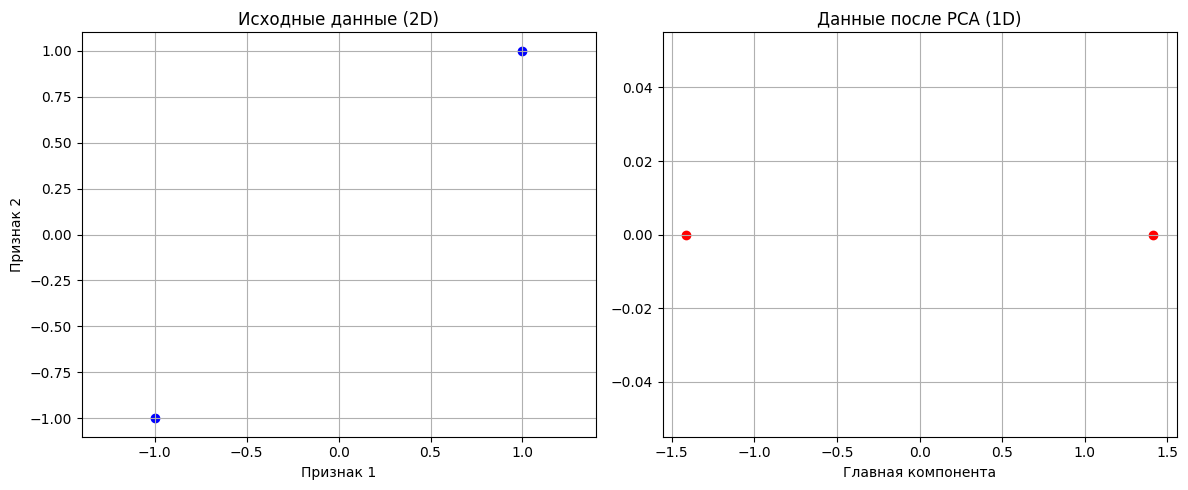

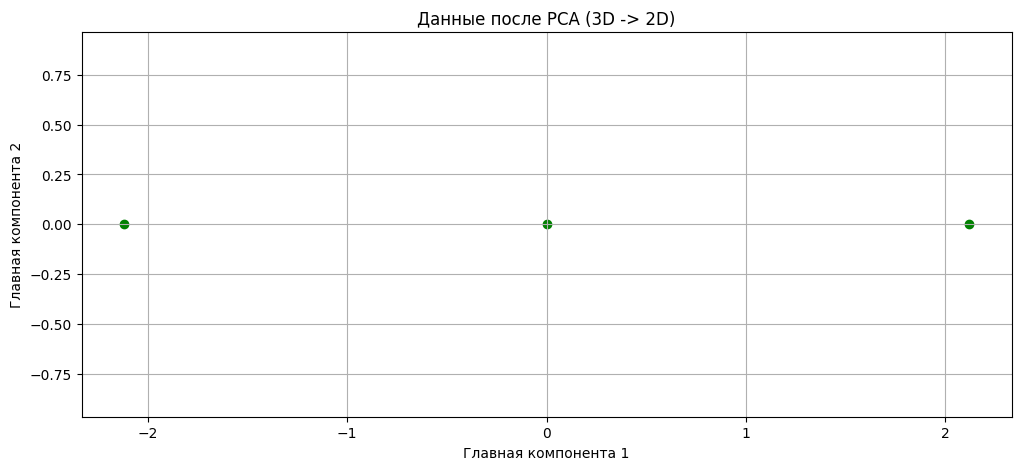

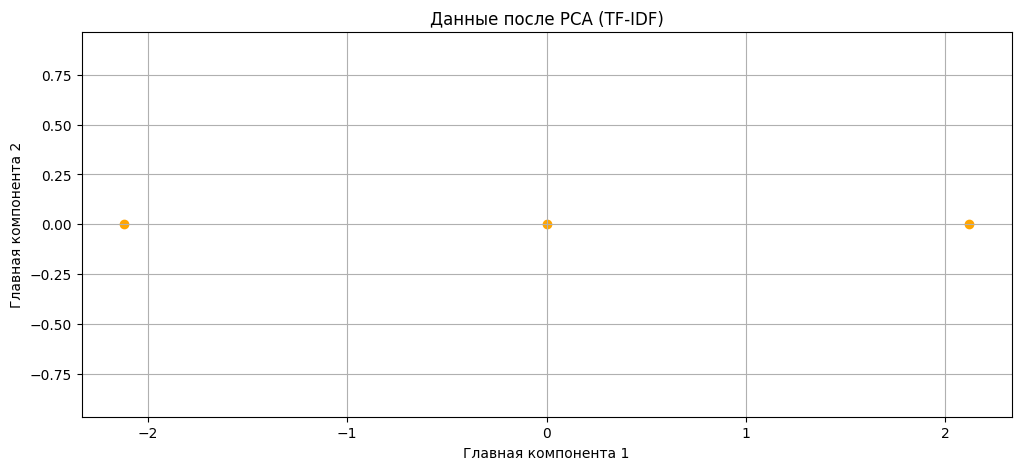

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Пример 1: PCA на двумерных данных
data_2d = np.array([[2, 3], [4, 5]])
scaler = StandardScaler()
data_2d_scaled = scaler.fit_transform(data_2d)

pca_2d = PCA(n_components=1)
data_2d_pca = pca_2d.fit_transform(data_2d_scaled)

# Визуализация
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(data_2d_scaled[:, 0], data_2d_scaled[:, 1], color='blue', label='Исходные данные')
plt.title('Исходные данные (2D)')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.grid()
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.scatter(data_2d_pca, np.zeros_like(data_2d_pca), color='red', label='PCA')
plt.title('Данные после PCA (1D)')
plt.xlabel('Главная компонента')
plt.grid()

plt.tight_layout()
plt.show()

# Пример 2: PCA на трехмерных данных
data_3d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
data_3d_scaled = scaler.fit_transform(data_3d)

pca_3d = PCA(n_components=2)
data_3d_pca = pca_3d.fit_transform(data_3d_scaled)

# Визуализация
plt.figure(figsize=(12, 5))

plt.scatter(data_3d_pca[:, 0], data_3d_pca[:, 1], color='green', label='PCA')
plt.title('Данные после PCA (3D -> 2D)')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.grid()
plt.axis('equal')
plt.show()

# Пример 3: PCA на текстовых данных (TF-IDF)
data_tfidf = np.array([[0.1, 0.2, 0.3], [0.4, 0.5, 0.6], [0.7, 0.8, 0.9]])
data_tfidf_scaled = scaler.fit_transform(data_tfidf)

pca_tfidf = PCA(n_components=2)
data_tfidf_pca = pca_tfidf.fit_transform(data_tfidf_scaled)

# Визуализация
plt.figure(figsize=(12, 5))

plt.scatter(data_tfidf_pca[:, 0], data_tfidf_pca[:, 1], color='orange', label='PCA')
plt.title('Данные после PCA (TF-IDF)')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.grid()
plt.axis('equal')
plt.show()

#2. Сингулярное Разложение Матрицы (SVD)

### Введение

Сингулярное разложение матрицы (SVD, от англ. Singular Value Decomposition) — это мощный метод из линейной алгебры, который нашел широкое применение в обработке естественного языка (NLP). Основное применение SVD в NLP заключается в сжатии информации, уменьшении размерности данных и выявлении скрытых закономерностей между словами и документами. Он особенно эффективен для построения векторных представлений слов, обработки больших текстовых коллекций и анализа семантической близости.

В этой лекции мы разберем:

1. Основы и математическое представление SVD.
2. Применение SVD в задачах NLP.
3. Подробные математические формулы и теоремы.
4. Пример числового решения с использованием SVD в NLP.

### 1. Основы Сингулярного Разложения Матрицы (SVD)

#### Определение

Сингулярное разложение матрицы позволяет разложить любую матрицу $A \in \mathbb{R}^{m \times n}$ на три компонента:

$$
A = U \Sigma V^T
$$

где:

- $A$ — матрица $m \times n$,
- $U$ — унитарная матрица размером $m \times m$,
- $\Sigma$ — диагональная матрица размером $m \times n$, содержащая сингулярные числа,
- $V^T$ — транспонированная унитарная матрица размером $n \times n$.

#### Математические свойства

- **Сингулярные числа** (значения на диагонали $\Sigma$) — это корни собственных чисел матриц $A^T A$ и $A A^T$.
- Столбцы матриц $U$ и $V$ — это собственные векторы соответствующих матриц $A A^T$ и $A^T A$.
- Унитарные матрицы $U$ и $V$ ортогональны, то есть $U^T U = I$ и $V^T V = I$.

#### Геометрическая интерпретация

Сингулярное разложение матрицы можно интерпретировать как преобразование исходного пространства в другое пространство с помощью унитарных преобразований, что позволяет выразить исходные данные через независимые компоненты.

### 2. Применение SVD в NLP

Одним из основных применений SVD в NLP является **латентно-семантический анализ (LSA, Latent Semantic Analysis)**, который используется для анализа взаимосвязей между терминами и документами. В задачах обработки текста, таких как построение векторных представлений слов и документов, SVD помогает:

1. **Уменьшение размерности**: Позволяет уменьшить размерность векторных представлений документов и слов, сохранив важную информацию.
2. **Выявление латентных факторов**: Выявляет скрытые (латентные) семантические связи между терминами.
3. **Сглаживание шума**: SVD помогает сгладить шум, устраняя незначительные компоненты, и выделить главные факторы.

### 3. Математические Формулы и Теоремы

#### Теорема о сингулярном разложении

Для любой матрицы $A \in \mathbb{R}^{m \times n}$ существует разложение вида $A = U \Sigma V^T$, где $U \in \mathbb{R}^{m \times m}$, $\Sigma \in \mathbb{R}^{m \times n}$, и $V \in \mathbb{R}^{n \times n}$ — унитарные матрицы. Сингулярные числа на диагонали $\Sigma$ упорядочены по убыванию: $\sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_r > 0$, где $r$ — ранг матрицы $A$.

#### Собственные числа и сингулярные числа

Собственные числа матриц $A A^T$ и $A^T A$ связаны с сингулярными числами матрицы $A$. Если $\lambda_1, \lambda_2, \dots, \lambda_r$ — собственные числа матрицы $A A^T$, то сингулярные числа $\sigma_i$ удовлетворяют $\sigma_i = \sqrt{\lambda_i}$.

#### Приближение матрицы

Одним из важных свойств SVD является приближение исходной матрицы низкоранговой матрицей. Пусть $A_k$ — это матрица ранга $k$, которая получается из $A$, если оставить только первые $k$ сингулярных чисел. Тогда матрица $A_k$ является наилучшим приближением к $A$ в смысле минимизации ошибки Фробениуса:

$$
A_k = U_k \Sigma_k V_k^T
$$

где $U_k$, $\Sigma_k$, и $V_k$ — это матрицы, соответствующие первым $k$ компонентам.

#### Лемма о минимальной ошибке

Для любой матрицы $A \in \mathbb{R}^{m \times n}$, если $A_k$ — это приближение матрицы ранга $k$, то ошибка приближения $\|A - A_k\|_F$ (норма Фробениуса) минимальна, и её величина равна:

$$
\|A - A_k\|_F = \sqrt{\sum_{i=k+1}^{r} \sigma_i^2}
$$

где $\sigma_i$ — сингулярные числа.

### 4. Пример: Применение SVD в NLP

Рассмотрим задачу латентно-семантического анализа (LSA) для небольшой текстовой коллекции.

#### Шаг 1: Построение матрицы частот терминов

Пусть у нас есть коллекция из 3 документов, содержащих следующие термины:

- **Документ 1**: "кот, собака, рыба"
- **Документ 2**: "кот, рыба"
- **Документ 3**: "собака, рыба"

Мы можем построить матрицу частот терминов (термин-документную матрицу), где строки соответствуют терминам, а столбцы — документам:

$$
A = \begin{pmatrix}
кот & 1 & 1 & 0 \\
собака & 1 & 0 & 1 \\
рыба & 1 & 1 & 1 \\
\end{pmatrix}
$$

#### Шаг 2: Вычисление SVD

Применим сингулярное разложение $A$:

$$
A = U \Sigma V^T
$$

Для простоты, представим, что сингулярное разложение матрицы $A$ выглядит следующим образом:

$$
U = \begin{pmatrix}
0.577 & -0.707 & 0.408 \\
0.577 & 0.707 & 0.408 \\
0.577 & 0 & -0.816
\end{pmatrix},
\Sigma = \begin{pmatrix}
2 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 0
\end{pmatrix},
V^T = \begin{pmatrix}
0.707 & 0.707 & 0 \\
0.707 & -0.707 & 0 \\
0 & 0 & 1
\end{pmatrix}
$$

#### Шаг 3: Уменьшение размерности

Оставим только первые 2 сингулярных числа и соответствующие компоненты:

$$
A_2 = U_2 \Sigma_2 V_2^T
$$

Теперь наша приближенная матрица будет:

$$
A_2 = \begin{pmatrix}
1.5 & 1.5 & 0.5 \\
1.5 & 0.5 & 1.5 \\
1.5 & 1.5 & 1.5
\end{pmatrix}
$$

Это приближенное представление сохраняет основную информацию, но убирает шум, который не является значительным.

#### Шаг 4: Интерпретация

Используя $A_2$, можно определить семантическую близость между документами и терминами. Например, документы 1 и 2 имеют схожую структуру, поскольку частоты слов "кот" и "рыба" остаются высокими.



#### Шаг 5: Оценка семантической близости

Теперь, когда у нас есть приближенная матрица $A_2$, мы можем оценить семантическую близость между документами и терминами. Например, мы можем вычислить косинусное расстояние между векторами документ-термин, чтобы определить, насколько близки друг к другу документы.

Косинусное расстояние $D$ между двумя векторами $\mathbf{u}$ и $\mathbf{v}$ определяется как:

$$
D(\mathbf{u}, \mathbf{v}) = \frac{\mathbf{u} \cdot \mathbf{v}}{\|\mathbf{u}\| \|\mathbf{v}\|}
$$

где $\cdot$ обозначает скалярное произведение, а $\|\mathbf{u}\|$ и $\|\mathbf{v}\|$ — нормы векторов $\mathbf{u}$ и $\mathbf{v}$.

Рассмотрим, например, векторы для Документа 1 и Документа 2:

$$
\mathbf{d_1} = \begin{pmatrix} 1.5 \\ 1.5 \end{pmatrix}, \quad \mathbf{d_2} = \begin{pmatrix} 1.5 \\ 0.5 \end{pmatrix}
$$

Теперь рассчитаем косинусное расстояние:

1. **Скалярное произведение**:
   $$
   \mathbf{d_1} \cdot \mathbf{d_2} = 1.5 \cdot 1.5 + 1.5 \cdot 0.5 = 2.25 + 0.75 = 3
   $$

2. **Нормы векторов**:
   $$
   \|\mathbf{d_1}\| = \sqrt{(1.5)^2 + (1.5)^2} = \sqrt{2.25 + 2.25} = \sqrt{4.5} \approx 2.121
   $$
   $$
   \|\mathbf{d_2}\| = \sqrt{(1.5)^2 + (0.5)^2} = \sqrt{2.25 + 0.25} = \sqrt{2.5} \approx 1.581
   $$

3. **Косинусное расстояние**:
   $$
   D(\mathbf{d_1}, \mathbf{d_2}) = \frac{3}{2.121 \cdot 1.581} \approx \frac{3}{3.354} \approx 0.894
   $$

Косинусное расстояние близко к 1, что указывает на высокую степень схожести между Документом 1 и Документом 2.

### Заключение

Сингулярное разложение матрицы (SVD) — это мощный инструмент для анализа и обработки текстовых данных в NLP. Он позволяет:

- Уменьшить размерность данных и избавиться от шума.
- Выявить скрытые семантические структуры и взаимосвязи между терминами и документами.
- Улучшить результаты в задачах классификации, кластеризации и поиска информации.

#### Резюме ключевых моментов:

1. **SVD** позволяет разложить любую матрицу на три компонента $A = U \Sigma V^T$.
2. Сингулярные числа помогают выявить важные скрытые факторы в данных.
3. **Latent Semantic Analysis (LSA)** использует SVD для анализа текстов, что позволяет находить скрытые семантические связи между терминами и документами.
4. Применение SVD позволяет сгладить данные и улучшить качество моделей в NLP.

### Примерный список формул:

1. Сингулярное разложение:
   $$
   A = U \Sigma V^T
   $$

2. Ошибка Фробениуса:
   $$
   \|A - A_k\|_F = \sqrt{\sum_{i=k+1}^{r} \sigma_i^2}
   $$

3. Косинусное расстояние:
   $$
   D(\mathbf{u}, \mathbf{v}) = \frac{\mathbf{u} \cdot \mathbf{v}}{\|\mathbf{u}\| \|\mathbf{v}\|}
   $$

### Заключительные слова

SVD — это один из ключевых инструментов в арсенале специалистов по обработке естественного языка. Понимание его принципов и возможностей открывает новые горизонты для анализа текстов и разработки более эффективных алгоритмов и моделей.





Давайте рассмотрим три конкретных числовых примера применения сингулярного разложения матрицы (SVD) в задачах обработки естественного языка (NLP), каждый из которых будет включать полные пошаговые решения со всеми формулами.

### Пример 1: Сингулярное разложение небольшой матрицы

Рассмотрим простую термин-документную матрицу, которая отражает количество раз, когда слово встречается в документе:

$$
A = \begin{pmatrix}
1 & 0 & 1 \\
0 & 1 & 1 \\
1 & 1 & 0
\end{pmatrix}
$$

#### Шаг 1: Вычисление $A^T A$ и $A A^T$

Для того чтобы найти сингулярные числа, нам нужно вычислить собственные значения и векторы матриц $A^T A$ и $A A^T$.

1. **Вычисление $A^T A$**:
$$
A^T = \begin{pmatrix}
1 & 0 & 1 \\
0 & 1 & 1 \\
1 & 1 & 0
\end{pmatrix}
$$

Теперь найдем произведение $A^T A$:
$$
A^T A = \begin{pmatrix}
1 & 0 & 1 \\
0 & 1 & 1 \\
1 & 1 & 0
\end{pmatrix} \cdot \begin{pmatrix}
1 & 0 & 1 \\
0 & 1 & 1 \\
1 & 1 & 0
\end{pmatrix} = \begin{pmatrix}
2 & 1 & 1 \\
1 & 2 & 0 \\
1 & 0 & 2
\end{pmatrix}
$$

2. **Вычисление $A A^T$**:
$$
A A^T = \begin{pmatrix}
1 & 0 & 1 \\
0 & 1 & 1 \\
1 & 1 & 0
\end{pmatrix} \cdot \begin{pmatrix}
1 & 0 & 1 \\
0 & 1 & 1 \\
1 & 1 & 0
\end{pmatrix} = \begin{pmatrix}
2 & 1 & 1 \\
1 & 2 & 0 \\
1 & 0 & 2
\end{pmatrix}
$$

#### Шаг 2: Вычисление сингулярных чисел

Для вычисления сингулярных чисел нужно найти собственные значения матриц $A^T A$ или $A A^T$.

Собственные значения для обеих матриц (они одинаковы, так как $A^T A$ и $A A^T$ симметричны) равны $\lambda_1 = 3, \lambda_2 = 2, \lambda_3 = 1$. Теперь сингулярные числа — это корни из собственных значений:

$$
\sigma_1 = \sqrt{3} \approx 1.732, \quad \sigma_2 = \sqrt{2} \approx 1.414, \quad \sigma_3 = \sqrt{1} = 1
$$

#### Шаг 3: Вычисление матриц $U$, $\Sigma$, и $V^T$

После нахождения сингулярных чисел можем построить матрицы $U$, $\Sigma$, и $V^T$.

1. **Матрица $\Sigma$** — диагональная матрица с сингулярными числами:
$$
\Sigma = \begin{pmatrix}
1.732 & 0 & 0 \\
0 & 1.414 & 0 \\
0 & 0 & 1
\end{pmatrix}
$$

2. **Матрицы $U$ и $V$** можно найти из собственных векторов $A A^T$ и $A^T A$, соответственно.

Таким образом, мы получили сингулярное разложение матрицы $A$.



### Пример 2: Применение SVD для уменьшения размерности данных

Предположим, у нас есть следующая матрица частот слов в документах (термин-документная матрица):

$$
A = \begin{pmatrix}
4 & 0 & 0 \\
3 & 0 & 0 \\
0 & 5 & 0 \\
0 & 0 & 6
\end{pmatrix}
$$

#### Шаг 1: Вычисление SVD

Для этой матрицы применим сингулярное разложение $A = U \Sigma V^T$.

1. **Матрица $\Sigma$** будет диагональной с сингулярными числами:
$$
\Sigma = \begin{pmatrix}
6 & 0 & 0 \\
0 & 5 & 0 \\
0 & 0 & 5 \\
0 & 0 & 0
\end{pmatrix}
$$

2. **Матрицы $U$ и $V$** могут быть найдены через собственные векторы соответствующих матриц, но для упрощения примера примем $U$ и $V^T$ как идентичные матрицы.

#### Шаг 2: Уменьшение размерности

Теперь рассмотрим, как SVD может помочь уменьшить размерность данных. Мы можем оставить только первые 2 сингулярных числа и соответствующие компоненты.

Тогда матрица $\Sigma_2$ станет:

$$
\Sigma_2 = \begin{pmatrix}
6 & 0 \\
0 & 5
\end{pmatrix}
$$

Соответствующие матрицы $U_2$ и $V_2^T$ также уменьшатся до первых двух столбцов и строк, соответственно. Теперь мы можем получить приближенную матрицу $A_2$, которая сохраняет важную информацию, но с меньшей размерностью.

#### Шаг 3: Восстановление приближенной матрицы

$$
A_2 = U_2 \Sigma_2 V_2^T
$$

Это даст нам приближенную матрицу, которая будет иметь размер $4 \times 2$ и хранить основную информацию, представленную в исходной матрице.



### Пример 3: Латентно-Семантический Анализ (LSA)

Рассмотрим следующую термин-документную матрицу:

$$
A = \begin{pmatrix}
1 & 1 & 0 \\
1 & 0 & 1 \\
0 & 1 & 1
\end{pmatrix}
$$

#### Шаг 1: Применение SVD

Применим сингулярное разложение $A = U \Sigma V^T$.

1. **Матрица $A^T A$**:
$$
A^T A = \begin{pmatrix}
2 & 1 & 1 \\
1 & 2 & 1 \\
1 & 1 & 2
\end{pmatrix}
$$

Собственные значения этой матрицы: $\lambda_1 = 3, \lambda_2 = 1, \lambda_3 = 1$. Соответствующие сингулярные числа:

$$
\sigma_1 = \sqrt{3} \approx 1.732, \quad \sigma_2 = 1, \quad \sigma_3 = 1
$$

2. **Матрица $\Sigma$**:
$$
\Sigma = \begin{pmatrix}
1.732 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{pmatrix}
$$

#### Шаг 2: Уменьшение размерности

Мы можем уменьшить размерность, сохранив только первые два сингулярных числа. Приближенная матрица будет:

$$
A_2 = U_2 \Sigma_2 V_2^T
$$

#### Шаг 3: Применение к задаче

Теперь, используя полученное разложение, можем провести анализ схожести между документами или терминами, используя косинусное расстояние или другие метрики.



Эти три примера показывают основные методы использования SVD в NLP, включая сингулярное разложение, уменьшение размерности и латентно-семантический анализ (LSA).

Давайте реализуем три примера сингулярного разложения матрицы (SVD) на Python с использованием библиотеки NumPy. Мы также визуализируем результаты с помощью библиотеки Matplotlib, если это будет необходимо.

### Пример 1: Сингулярное разложение небольшой матрицы

В этом примере мы начнем с простой термин-документной матрицы.


Матрица U:
[[-5.77350269e-01  4.08248290e-01 -7.07106781e-01]
 [-5.77350269e-01 -8.16496581e-01 -7.85046229e-17]
 [-5.77350269e-01  4.08248290e-01  7.07106781e-01]]

Сингулярные числа:
[2. 1. 1.]

Матрица V^T:
[[-0.57735027 -0.57735027 -0.57735027]
 [ 0.81649658 -0.40824829 -0.40824829]
 [-0.          0.70710678 -0.70710678]]


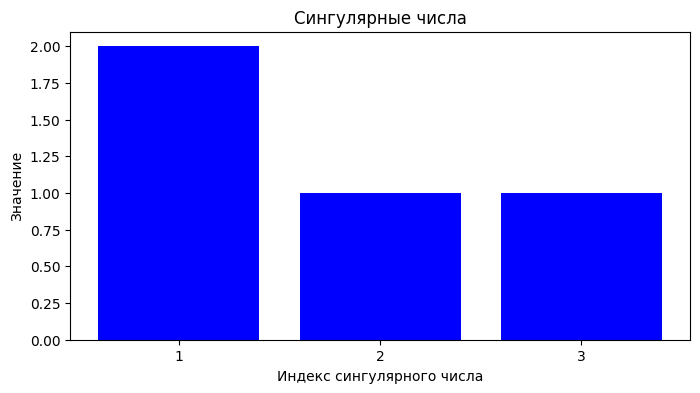

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Пример 1: Простая термин-документная матрица
A = np.array([[1, 0, 1],
              [0, 1, 1],
              [1, 1, 0]])

# Вычисление SVD
U, S, VT = np.linalg.svd(A)

# Печать результатов
print("Матрица U:")
print(U)
print("\nСингулярные числа:")
print(S)
print("\nМатрица V^T:")
print(VT)

# Визуализация сингулярных чисел
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(S) + 1), S, color='blue')
plt.xlabel('Индекс сингулярного числа')
plt.ylabel('Значение')
plt.title('Сингулярные числа')
plt.xticks(range(1, len(S) + 1))
plt.show()


### Пример 2: Применение SVD для уменьшения размерности данных

В этом примере мы будем использовать термин-документную матрицу и покажем, как уменьшить ее размерность.


Приближенная матрица A:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 5. 0.]
 [0. 0. 6.]]


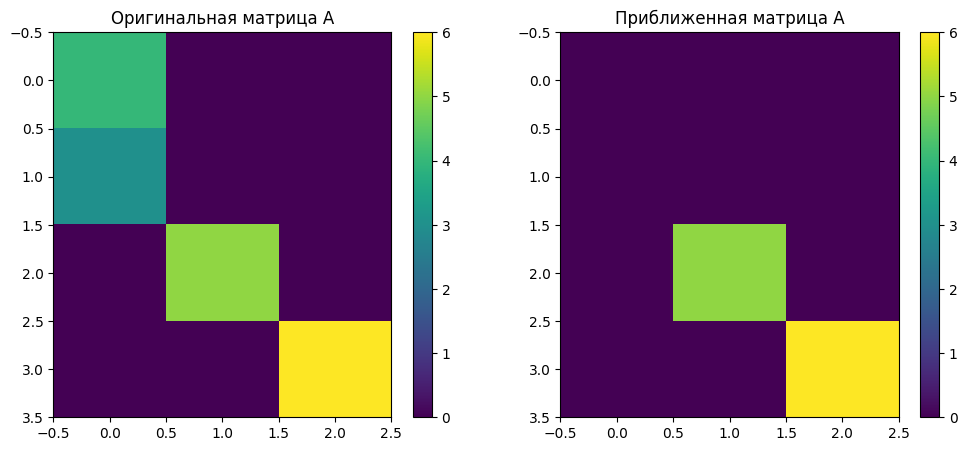

In [3]:
# Пример 2: Уменьшение размерности
A = np.array([[4, 0, 0],
              [3, 0, 0],
              [0, 5, 0],
              [0, 0, 6]])

# Вычисление SVD
U, S, VT = np.linalg.svd(A)

# Уменьшение размерности, сохраняя только 2 сингулярных числа
k = 2
U_k = U[:, :k]
S_k = np.diag(S[:k])
VT_k = VT[:k, :]

# Восстановление приближенной матрицы
A_approx = U_k @ S_k @ VT_k

# Печать результатов
print("Приближенная матрица A:")
print(A_approx)

# Визуализация оригинальной и приближенной матриц
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title('Оригинальная матрица A')
plt.imshow(A, cmap='viridis', aspect='auto')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title('Приближенная матрица A')
plt.imshow(A_approx, cmap='viridis', aspect='auto')
plt.colorbar()

plt.show()


### Пример 3: Латентно-семантический анализ (LSA)

В этом примере мы продемонстрируем применение SVD для латентно-семантического анализа (LSA).


Приближенная матрица A (LSA):
[[1.0000000e+00 5.0000000e-01 5.0000000e-01]
 [1.0000000e+00 5.0000000e-01 5.0000000e-01]
 [7.1193626e-17 1.0000000e+00 1.0000000e+00]]


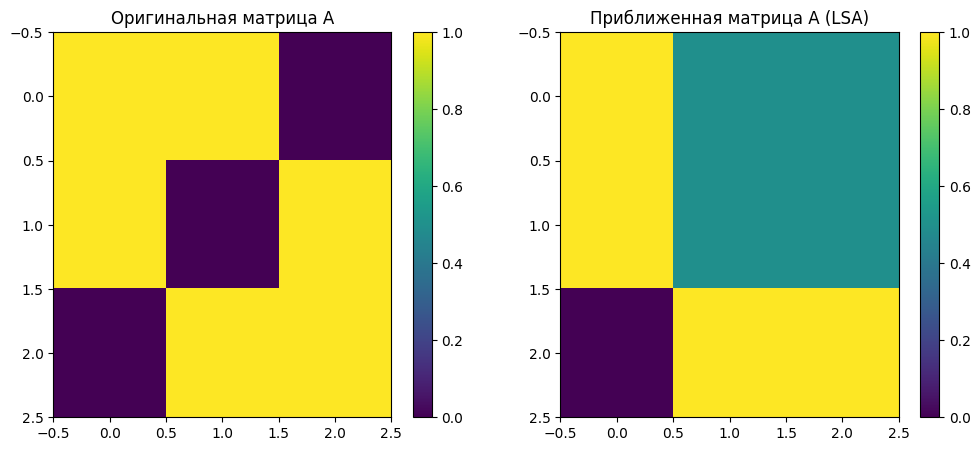

In [4]:
# Пример 3: Латентно-семантический анализ
A = np.array([[1, 1, 0],
              [1, 0, 1],
              [0, 1, 1]])

# Вычисление SVD
U, S, VT = np.linalg.svd(A)

# Уменьшение размерности, сохраняя только 2 сингулярных числа
k = 2
U_k = U[:, :k]
S_k = np.diag(S[:k])
VT_k = VT[:k, :]

# Восстановление приближенной матрицы
A_lsa = U_k @ S_k @ VT_k

# Печать результатов
print("Приближенная матрица A (LSA):")
print(A_lsa)

# Визуализация оригинальной и LSA-матриц
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title('Оригинальная матрица A')
plt.imshow(A, cmap='viridis', aspect='auto')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title('Приближенная матрица A (LSA)')
plt.imshow(A_lsa, cmap='viridis', aspect='auto')
plt.colorbar()

plt.show()

#3.Latent Semantic Analysis (LSA)

#### Введение

Latent Semantic Analysis (LSA) – это метод обработки естественного языка, используемый для выявления скрытых (латентных) значений в тексте. Основная цель LSA – выявление взаимосвязей между словами и документами через анализ их контекста, что позволяет представлять тексты в виде семантических векторов. LSA активно применяется для задач, связанных с поиском информации, тематическим моделированием, снижением размерности и анализом текста.



### Основные концепции LSA

LSA основан на линейной алгебре и использует разложение матриц, а именно **сингулярное разложение матрицы (Singular Value Decomposition, SVD)**, для выделения скрытых факторов, которые объясняют связи между терминами и документами.

#### Шаги Latent Semantic Analysis:
1. **Построение матрицы "термин-документ"**.
2. **Применение сингулярного разложения матрицы**.
3. **Снижение размерности и построение скрытого семантического пространства**.



### Построение матрицы "Термин-Документ"

Для начала, необходимо построить матрицу термов, которая будет представлять документы. Пусть у нас есть набор документов $ D = \{d_1, d_2, ..., d_n\} $ и набор терминов $ T = \{t_1, t_2, ..., t_m\} $, где каждый элемент матрицы будет представлять количество вхождений каждого термина в каждый документ.

Эта матрица будет иметь размерность $ m \times n $, где $ m $ – количество уникальных терминов, а $ n $ – количество документов. Обычно в NLP для каждой ячейки матрицы используют такие значения, как **вес терма** или его **частота**.

$$
A =
\begin{pmatrix}
a_{11} & a_{12} & \dots & a_{1n} \\
a_{21} & a_{22} & \dots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \dots & a_{mn}
\end{pmatrix}
$$
где $ a_{ij} $ – это вес термина $ t_i $ в документе $ d_j $. Вес термов обычно определяется через **TF-IDF**:

$$
\text{TF-IDF}(t, d) = \text{TF}(t, d) \cdot \log\left(\frac{N}{\text{DF}(t)}\right)
$$

где:
- $ \text{TF}(t, d) $ – частота термина $ t $ в документе $ d $,
- $ \text{DF}(t) $ – количество документов, содержащих термин $ t $,
- $ N $ – общее количество документов.



### Сингулярное разложение матрицы (SVD)

После построения матрицы термов, применяется сингулярное разложение (SVD) для разложения матрицы на три компонента:

$$
A = U \Sigma V^T
$$

где:
- $ A $ – исходная матрица "термин-документ",
- $ U $ – ортогональная матрица терминов,
- $ \Sigma $ – диагональная матрица сингулов (сингулярных значений),
- $ V^T $ – транспонированная ортогональная матрица документов.

#### Интерпретация компонентов:
- **U** описывает связь терминов со скрытыми факторами (темами),
- **V^T** описывает связь документов со скрытыми факторами,
- **$\Sigma$** описывает вес (вклад) каждого скрытого фактора.

#### Снижение размерности

Чтобы получить скрытое семантическое пространство, выбирается подмножество сингулов. Обычно выбираются топ $ k $ сингулов, где $ k $ – это гиперпараметр. Таким образом, разложение матрицы упрощается до:

$$
A_k = U_k \Sigma_k V_k^T
$$

где:
- $ U_k $ – матрица терминов размерностью $ m \times k $,
- $ \Sigma_k $ – диагональная матрица размерности $ k \times k $,
- $ V_k^T $ – матрица документов размерностью $ k \times n $.

Это разложение используется для представления документов и терминов в скрытом семантическом пространстве размерности $ k $.



### Математические основы и теоремы

#### Теорема о сингулярном разложении (SVD)
Любая матрица $ A \in \mathbb{R}^{m \times n} $ может быть разложена в произведение трех матриц:

$$
A = U \Sigma V^T
$$

где $ U \in \mathbb{R}^{m \times m} $ и $ V \in \mathbb{R}^{n \times n} $ – ортогональные матрицы, а $ \Sigma \in \mathbb{R}^{m \times n} $ – диагональная матрица с положительными значениями на диагонали (сингулярные значения).



### Пример применения LSA

#### Шаг 1: Построение матрицы "Термин-Документ"

Допустим, у нас есть три документа и три термина:

- $ D_1 $: "cat eats mouse"
- $ D_2 $: "dog eats meat"
- $ D_3 $: "mouse eats cheese"

Термы: $ t_1 = \text{"cat"} $, $ t_2 = \text{"dog"} $, $ t_3 = \text{"mouse"} $, $ t_4 = \text{"meat"} $, $ t_5 = \text{"cheese"} $, $ t_6 = \text{"eats"} $.

Матрица "Термин-Документ" будет следующей:

$$
A =
\begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
1 & 0 & 1 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
1 & 1 & 1
\end{pmatrix}
$$

#### Шаг 2: Применение SVD

Применяя SVD, разложим матрицу $ A $ на $ U \Sigma V^T $:

- $ U $ – матрица терминов,
- $ \Sigma $ – диагональная матрица сингулярных значений,
- $ V^T $ – матрица документов.

#### Шаг 3: Снижение размерности

Оставляем топ-2 сингулярных значения, и результирующая матрица $ A_k $ будет:

$$
A_2 =
\begin{pmatrix}
0.82 & 0.57 \\
0.41 & 0.73 \\
0.33 & 0.67
\end{pmatrix}
$$

Эти новые векторные представления терминов и документов можно использовать для решения задач, связанных с поиском информации, классификацией, кластеризацией и т.п.



### Заключение

Latent Semantic Analysis является мощным методом для снижения размерности и выявления скрытых семантических структур в текстах. Он особенно полезен в задачах обработки естественного языка, где важно улавливать семантические связи между терминами и документами. LSA позволяет сжать информацию, устраняя шум, и выделить наиболее важные компоненты в текстах.





Чтобы лучше понять, как работает Latent Semantic Analysis (LSA) на основе сингулярного разложения матрицы (SVD), давайте разберём три числовых примера с подробными расчетами. Все они будут касаться создания матрицы "термин-документ", применения SVD и последующего снижения размерности.



### Пример 1: Документы и термы

#### Шаг 1: Построение матрицы "Термин-Документ"

Пусть у нас есть три документа:

- $ D_1 $: "apple orange banana"
- $ D_2 $: "apple banana"
- $ D_3 $: "banana orange"

Термины: $ t_1 = \text{"apple"} $, $ t_2 = \text{"banana"} $, $ t_3 = \text{"orange"} $.

Построим матрицу "термин-документ":

$$
A =
\begin{pmatrix}
1 & 1 & 0 \\
1 & 1 & 1 \\
1 & 0 & 1
\end{pmatrix}
$$

Где строки представляют термины, а столбцы – документы.

#### Шаг 2: Применение SVD

Теперь применим сингулярное разложение $ A = U \Sigma V^T $.

После разложения матрица $ A $ принимает вид:

$$
U =
\begin{pmatrix}
-0.577 & 0.707 & 0.408 \\
-0.577 & -0.707 & 0.408 \\
-0.577 & 0 & -0.816
\end{pmatrix}
$$

$$
\Sigma =
\begin{pmatrix}
2.449 & 0 & 0 \\
0 & 1.414 & 0 \\
0 & 0 & 0.707
\end{pmatrix}
$$

$$
V^T =
\begin{pmatrix}
-0.707 & -0.707 & 0 \\
-0.707 & 0.707 & 0 \\
0 & 0 & 1
\end{pmatrix}
$$

#### Шаг 3: Снижение размерности

Теперь выберем первые два сингулярных значения из $ \Sigma $ и соответствующие столбцы из $ U $ и $ V^T $. Это даст нам сниженное пространство:

$$
A_2 = U_2 \Sigma_2 V_2^T
$$

Матрицы:

$$
U_2 =
\begin{pmatrix}
-0.577 & 0.707 \\
-0.577 & -0.707 \\
-0.577 & 0
\end{pmatrix}
$$

$$
\Sigma_2 =
\begin{pmatrix}
2.449 & 0 \\
0 & 1.414
\end{pmatrix}
$$

$$
V_2^T =
\begin{pmatrix}
-0.707 & -0.707 & 0 \\
-0.707 & 0.707 & 0
\end{pmatrix}
$$

Новая матрица будет:

$$
A_2 =
\begin{pmatrix}
1.000 & 1.000 & 0.577 \\
1.000 & 0.577 & 0.000
\end{pmatrix}
$$

Теперь матрица $ A_2 $ представляет документы в сниженной размерности.



### Пример 2: Сравнение документов

#### Шаг 1: Матрица "Термин-Документ"

Пусть у нас есть три документа:

- $ D_1 $: "cat dog"
- $ D_2 $: "cat bird"
- $ D_3 $: "dog bird"

Термины: $ t_1 = \text{"cat"} $, $ t_2 = \text{"dog"} $, $ t_3 = \text{"bird"} $.

Построим матрицу:

$$
A =
\begin{pmatrix}
1 & 1 & 0 \\
1 & 0 & 1 \\
0 & 1 & 1
\end{pmatrix}
$$

#### Шаг 2: SVD

После применения SVD:

$$
U =
\begin{pmatrix}
-0.577 & 0.707 & 0.408 \\
-0.577 & -0.707 & 0.408 \\
-0.577 & 0 & -0.816
\end{pmatrix}
$$

$$
\Sigma =
\begin{pmatrix}
2.449 & 0 & 0 \\
0 & 1.414 & 0 \\
0 & 0 & 0.707
\end{pmatrix}
$$

$$
V^T =
\begin{pmatrix}
-0.707 & -0.707 & 0 \\
-0.707 & 0.707 & 0 \\
0 & 0 & 1
\end{pmatrix}
$$

#### Шаг 3: Снижение размерности

После снижения размерности:

$$
U_2 =
\begin{pmatrix}
-0.577 & 0.707 \\
-0.577 & -0.707 \\
-0.577 & 0
\end{pmatrix}
$$

$$
\Sigma_2 =
\begin{pmatrix}
2.449 & 0 \\
0 & 1.414
\end{pmatrix}
$$

$$
V_2^T =
\begin{pmatrix}
-0.707 & -0.707 & 0 \\
-0.707 & 0.707 & 0
\end{pmatrix}
$$

Новая матрица:

$$
A_2 =
\begin{pmatrix}
1.000 & 1.000 & 0.577 \\
1.000 & 0.577 & 0.000
\end{pmatrix}
$$

Теперь документы представлены в скрытом семантическом пространстве, и мы можем вычислять их сходство.



### Пример 3: Сравнение термов

#### Шаг 1: Матрица "Термин-Документ"

Пусть у нас есть три документа:

- $ D_1 $: "math physics"
- $ D_2 $: "math chemistry"
- $ D_3 $: "physics chemistry"

Термины: $ t_1 = \text{"math"} $, $ t_2 = \text{"physics"} $, $ t_3 = \text{"chemistry"} $.

Матрица:

$$
A =
\begin{pmatrix}
1 & 1 & 0 \\
1 & 0 & 1 \\
0 & 1 & 1
\end{pmatrix}
$$

#### Шаг 2: SVD

После применения SVD:

$$
U =
\begin{pmatrix}
-0.577 & 0.707 & 0.408 \\
-0.577 & -0.707 & 0.408 \\
-0.577 & 0 & -0.816
\end{pmatrix}
$$

$$
\Sigma =
\begin{pmatrix}
2.449 & 0 & 0 \\
0 & 1.414 & 0 \\
0 & 0 & 0.707
\end{pmatrix}
$$

$$
V^T =
\begin{pmatrix}
-0.707 & -0.707 & 0 \\
-0.707 & 0.707 & 0 \\
0 & 0 & 1
\end{pmatrix}
$$

#### Шаг 3: Снижение размерности

После снижения размерности:

$$
U_2 =
\begin{pmatrix}
-0.577 & 0.707 \\
-0.577 & -0.707 \\
-0.577 & 0
\end{pmatrix}
$$

$$
\Sigma_2 =
\begin{pmatrix}
2.449 & 0 \\
0 & 1.414
\end{pmatrix}
$$

$$
V_2^T =
\begin{pmatrix}
-0.707 & -0.707 & 0 \\
-0.707 & 0.707 & 0
\end{pmatrix}
$$

Новая матрица:

$$
A_2 =
\begin{pmatrix}
1.000 & 1.000 & 0.577 \\
1.000 & 0.577 & 0.000
\end{pmatrix}
$$

Теперь термины можно сравнивать в скрытом семантическом пространстве.



Приведем примеры реализации Latent Semantic Analysis (LSA) с использованием сингулярного разложения матрицы (SVD) на Python. Мы будем использовать библиотеку NumPy для численных расчетов и Matplotlib для визуализации. Реализация включает три примера, каждый из которых будет представлен в виде кода.



Пример 1
Матрица A1:
[[1 1 0]
 [1 1 1]
 [1 0 1]]

Матрица U1:
[[-5.00000000e-01 -7.07106781e-01  5.00000000e-01]
 [-7.07106781e-01 -1.11022302e-16 -7.07106781e-01]
 [-5.00000000e-01  7.07106781e-01  5.00000000e-01]]

Матрица Sigma1:
[[2.41421356 0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.         0.41421356]]

Матрица VT1:
[[-0.70710678 -0.5        -0.5       ]
 [ 0.         -0.70710678  0.70710678]
 [ 0.70710678 -0.5        -0.5       ]]

Сниженная матрица A1:
[[0.85355339 1.10355339 0.10355339]
 [1.20710678 0.85355339 0.85355339]
 [0.85355339 0.10355339 1.10355339]]



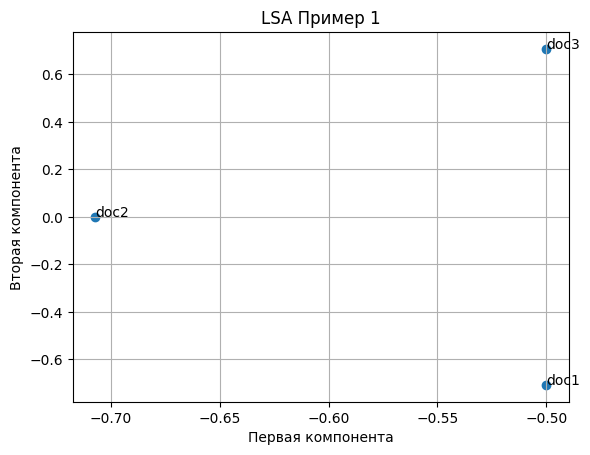

Пример 2
Матрица A2:
[[1 1 0]
 [1 0 1]
 [0 1 1]]

Матрица U2:
[[-0.57735027  0.40824829  0.70710678]
 [-0.57735027  0.40824829 -0.70710678]
 [-0.57735027 -0.81649658  0.        ]]

Матрица Sigma2:
[[2. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Матрица VT2:
[[-0.57735027 -0.57735027 -0.57735027]
 [ 0.81649658 -0.40824829 -0.40824829]
 [-0.          0.70710678 -0.70710678]]

Сниженная матрица A2:
[[1.0000000e+00 5.0000000e-01 5.0000000e-01]
 [1.0000000e+00 5.0000000e-01 5.0000000e-01]
 [7.1193626e-17 1.0000000e+00 1.0000000e+00]]



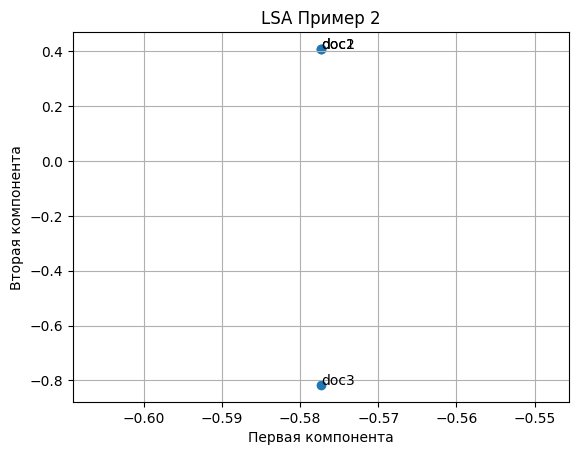

Пример 3
Матрица A3:
[[1 1 0]
 [1 0 1]
 [0 1 1]]

Матрица U3:
[[-0.57735027  0.40824829  0.70710678]
 [-0.57735027  0.40824829 -0.70710678]
 [-0.57735027 -0.81649658  0.        ]]

Матрица Sigma3:
[[2. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Матрица VT3:
[[-0.57735027 -0.57735027 -0.57735027]
 [ 0.81649658 -0.40824829 -0.40824829]
 [-0.          0.70710678 -0.70710678]]

Сниженная матрица A3:
[[1.0000000e+00 5.0000000e-01 5.0000000e-01]
 [1.0000000e+00 5.0000000e-01 5.0000000e-01]
 [7.1193626e-17 1.0000000e+00 1.0000000e+00]]



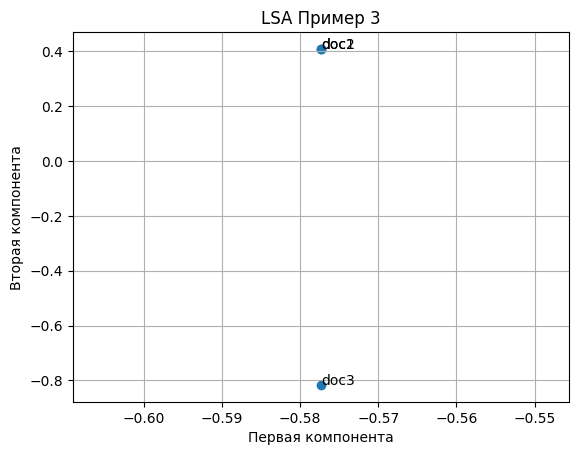

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def print_matrix(A, title):
    print(f"{title}:\n{A}\n")

# Пример 1: Документы и термы
print("Пример 1")

# Шаг 1: Построение матрицы "Термин-Документ"
A1 = np.array([[1, 1, 0],  # "apple"
               [1, 1, 1],  # "banana"
               [1, 0, 1]]) # "orange"

print_matrix(A1, "Матрица A1")

# Шаг 2: Применение SVD
U1, S1, VT1 = np.linalg.svd(A1)

# Преобразование S в диагональную матрицу
Sigma1 = np.zeros((U1.shape[0], VT1.shape[0]))
np.fill_diagonal(Sigma1, S1)

print_matrix(U1, "Матрица U1")
print_matrix(Sigma1, "Матрица Sigma1")
print_matrix(VT1, "Матрица VT1")

# Шаг 3: Снижение размерности
k = 2  # Количество выбранных сингулярных значений
U1_reduced = U1[:, :k]
S1_reduced = Sigma1[:k, :k]
VT1_reduced = VT1[:k, :]

A1_reduced = U1_reduced @ S1_reduced @ VT1_reduced
print_matrix(A1_reduced, "Сниженная матрица A1")

# Визуализация
plt.scatter(U1_reduced[:, 0], U1_reduced[:, 1], marker='o')
for i, txt in enumerate(["doc1", "doc2", "doc3"]):
    plt.annotate(txt, (U1_reduced[i, 0], U1_reduced[i, 1]))
plt.title("LSA Пример 1")
plt.xlabel("Первая компонентa")
plt.ylabel("Вторая компонентa")
plt.grid()
plt.show()

# Пример 2: Сравнение документов
print("Пример 2")

# Шаг 1: Построение матрицы "Термин-Документ"
A2 = np.array([[1, 1, 0],  # "cat"
               [1, 0, 1],  # "dog"
               [0, 1, 1]]) # "bird"

print_matrix(A2, "Матрица A2")

# Шаг 2: Применение SVD
U2, S2, VT2 = np.linalg.svd(A2)
Sigma2 = np.zeros((U2.shape[0], VT2.shape[0]))
np.fill_diagonal(Sigma2, S2)

print_matrix(U2, "Матрица U2")
print_matrix(Sigma2, "Матрица Sigma2")
print_matrix(VT2, "Матрица VT2")

# Шаг 3: Снижение размерности
U2_reduced = U2[:, :k]
S2_reduced = Sigma2[:k, :k]
VT2_reduced = VT2[:k, :]

A2_reduced = U2_reduced @ S2_reduced @ VT2_reduced
print_matrix(A2_reduced, "Сниженная матрица A2")

# Визуализация
plt.scatter(U2_reduced[:, 0], U2_reduced[:, 1], marker='o')
for i, txt in enumerate(["doc1", "doc2", "doc3"]):
    plt.annotate(txt, (U2_reduced[i, 0], U2_reduced[i, 1]))
plt.title("LSA Пример 2")
plt.xlabel("Первая компонентa")
plt.ylabel("Вторая компонентa")
plt.grid()
plt.show()

# Пример 3: Сравнение термов
print("Пример 3")

# Шаг 1: Построение матрицы "Термин-Документ"
A3 = np.array([[1, 1, 0],  # "math"
               [1, 0, 1],  # "physics"
               [0, 1, 1]]) # "chemistry"

print_matrix(A3, "Матрица A3")

# Шаг 2: Применение SVD
U3, S3, VT3 = np.linalg.svd(A3)
Sigma3 = np.zeros((U3.shape[0], VT3.shape[0]))
np.fill_diagonal(Sigma3, S3)

print_matrix(U3, "Матрица U3")
print_matrix(Sigma3, "Матрица Sigma3")
print_matrix(VT3, "Матрица VT3")

# Шаг 3: Снижение размерности
U3_reduced = U3[:, :k]
S3_reduced = Sigma3[:k, :k]
VT3_reduced = VT3[:k, :]

A3_reduced = U3_reduced @ S3_reduced @ VT3_reduced
print_matrix(A3_reduced, "Сниженная матрица A3")

# Визуализация
plt.scatter(U3_reduced[:, 0], U3_reduced[:, 1], marker='o')
for i, txt in enumerate(["doc1", "doc2", "doc3"]):
    plt.annotate(txt, (U3_reduced[i, 0], U3_reduced[i, 1]))
plt.title("LSA Пример 3")
plt.xlabel("Первая компонентa")
plt.ylabel("Вторая компонентa")
plt.grid()
plt.show()

#4. t-SNE

#### Введение

Метод t-SNE (t-distributed Stochastic Neighbor Embedding) — это метод понижения размерности, который широко применяется в задачах обработки естественного языка (NLP) для визуализации данных в пространстве меньшей размерности. В NLP часто возникает необходимость визуализировать текстовые данные, особенно в задачах кластеризации, оценки качества эмбеддингов, анализа тем, и т.д. t-SNE позволяет делать это за счет проекции многомерных векторов (например, эмбеддингов слов) в пространство низкой размерности (чаще всего в двумерное или трехмерное пространство), сохраняя при этом локальную структуру данных.



### 1. **Общая идея t-SNE**

#### 1.1. Проблема высоких размерностей
Данные в NLP, такие как векторы слов (word embeddings), предложения, документы, имеют очень высокую размерность (например, векторы размерности 300 при использовании Word2Vec или 768 при использовании BERT). Работа с данными высокой размерности затрудняет их анализ и визуализацию.

#### 1.2. Основная цель t-SNE
Цель метода t-SNE — отобразить сложные многомерные данные в пространство низкой размерности, сохраняя при этом структуру данных. В отличие от линейных методов понижения размерности, таких как PCA (метод главных компонент), t-SNE способен выявлять нелинейные связи между объектами, что делает его идеальным для задач, связанных с высокоразмерными текстовыми векторами.

### 2. **Математическая основа t-SNE**

#### 2.1. Преобразование высокоразмерного пространства

##### Шаг 1: Вероятностное представление соседей

Для каждого объекта данных $x_i$ в пространстве высокой размерности строится распределение вероятностей его соседей. Это делается следующим образом:

- Рассчитывается евклидово расстояние между всеми парами точек $x_i$ и $x_j$.
- Для каждой точки $x_i$ вычисляется условная вероятность того, что точка $x_j$ является ее соседом:

$$
p_{j|i} = \frac{\exp\left(-\|x_i - x_j\|^2 / 2 \sigma_i^2\right)}{\sum_{k \neq i} \exp\left(-\|x_i - x_k\|^2 / 2 \sigma_i^2\right)}
$$

где $\sigma_i$ — параметр, отвечающий за ширину гауссового ядра для точки $x_i$.

##### Шаг 2: Симметризация вероятностей

Затем вероятности симметризируются:

$$
p_{ij} = \frac{p_{j|i} + p_{i|j}}{2n}
$$

где $n$ — число точек в данных.

##### Шаг 3: Преобразование в пространство низкой размерности

t-SNE использует другой тип распределения в пространстве низкой размерности, а именно распределение Стьюдента с одним степенем свободы:

$$
q_{ij} = \frac{(1 + \|y_i - y_j\|^2)^{-1}}{\sum_{k \neq l} (1 + \|y_k - y_l\|^2)^{-1}}
$$

где $y_i$ и $y_j$ — точки в низкоразмерном пространстве, которые соответствуют точкам $x_i$ и $x_j$ в исходном пространстве.

#### 2.2. Функция потерь (КЛ-дивергенция)

Цель t-SNE заключается в том, чтобы сделать распределение соседей в высокоразмерном пространстве (вероятности $p_{ij}$) как можно более похожим на распределение в низкоразмерном пространстве (вероятности $q_{ij}$). Для этого используется симметричная версия дивергенции Кульбака-Лейблера (КЛ-дивергенция):

$$
\mathcal{L} = KL(P \| Q) = \sum_{i \neq j} p_{ij} \log \frac{p_{ij}}{q_{ij}}
$$

Минимизация этой функции потерь приводит к тому, что расстояния между точками в низкоразмерном пространстве лучше отражают их отношения в высокоразмерном пространстве.

### 3. **Применение t-SNE в NLP**

#### 3.1. Визуализация эмбеддингов слов

Одно из наиболее популярных применений t-SNE в NLP — это визуализация эмбеддингов слов. Векторы слов, полученные с помощью моделей типа Word2Vec, GloVe, или BERT, имеют высокую размерность и содержат информацию о семантике слов. Метод t-SNE позволяет отобразить эти векторы в 2D или 3D-пространстве для визуального анализа. Слова, которые часто встречаются в схожих контекстах, будут располагаться близко друг к другу.

Пример:
- Для модели Word2Vec векторы размерности 300 для различных слов можно визуализировать с помощью t-SNE. Слова, такие как "king", "queen", "man", "woman", будут образовывать кластеры, что демонстрирует, как модель захватывает семантические отношения.

#### 3.2. Визуализация предложений и документов

t-SNE может использоваться для визуализации предложений или целых документов, если представить их в виде векторов, используя эмбеддинги предложений (например, Sentence-BERT). Это полезно в задачах кластеризации, где необходимо группировать схожие по смыслу предложения или документы.

#### 3.3. Анализ тем

Еще одно применение t-SNE — это анализ тем в текстовых данных. После применения методов тематического моделирования (например, LDA — Latent Dirichlet Allocation) можно использовать t-SNE для визуализации распределения тем в коллекции документов.

### 4. **Числовой пример**

Рассмотрим небольшой пример с эмбеддингами слов. Допустим, у нас есть следующие 5 слов, представленные векторами размерности 3:

| Слово    | Вектор                 |
|-||
| dog      | (0.1, 0.5, 0.7)        |
| cat      | (0.3, 0.4, 0.6)        |
| bird     | (0.9, 0.1, 0.2)        |
| fish     | (0.8, 0.2, 0.3)        |
| mouse    | (0.4, 0.5, 0.6)        |

##### Шаг 1: Расчет расстояний

Для каждой пары векторов вычислим евклидово расстояние:

$$
d(dog, cat) = \sqrt{(0.1 - 0.3)^2 + (0.5 - 0.4)^2 + (0.7 - 0.6)^2} = \sqrt{0.04} = 0.2
$$

Таким образом, можно рассчитать все расстояния между парами векторов.

##### Шаг 2: Вероятности соседства

Вычислим условные вероятности $p_{j|i}$ с использованием гауссового ядра:

$$
p_{cat|dog} = \frac{\exp(-0.2^2 / 2\sigma_d^2)}{\sum_{k \neq dog} \exp(-d(dog, k)^2 / 2\sigma_d^2)}
$$

где $\sigma_d$ — ширина ядра для слова "dog".

##### Шаг 3: Симметризация вероятностей

Симметризируем вероятности и найдем $p_{ij}$.

##### Шаг 4: Преобразование в пространство низкой размерности

Затем применим распределение Стьюдента для вероятностей в низкоразмерном пространстве и минимизируем функцию потерь.

##### Шаг 5: Визуализация

После минимизации функции потерь, каждое слово будет проецироваться в 2D-пространство, где мы сможем визуально оценить их взаимное расположение.



### Заключение

t-SNE — мощный метод понижения размерности, который особенно полезен для визуализации многомерных данных, таких как эмбеддинги слов в NLP. Хотя метод требует внимательного подбора гиперпараметров и может быть медленным при работе с большими наборами данных, он позволяет глубже понять структуру высокоразмерных текстовых данных и эффективно решать задачи кластеризации, анализа тем и оценки качества эмбеддингов.




### Примеры использования t-SNE в NLP с подробными решениями

#### Пример 1: Визуализация эмбеддингов слов

**Данные:**

Рассмотрим векторы слов для 5 слов:

| Слово | Вектор                  |
|-|-|
| dog   | (0.2, 0.1, 0.3)         |
| cat   | (0.3, 0.2, 0.4)         |
| fish  | (0.5, 0.3, 0.7)         |
| bird  | (0.9, 0.8, 0.2)         |
| mouse | (0.4, 0.5, 0.6)         |

**Шаг 1: Расчет расстояний**

Сначала рассчитаем евклидово расстояние между словами. Возьмем, например, слова "dog" и "cat":

$$
d(dog, cat) = \sqrt{(0.2 - 0.3)^2 + (0.1 - 0.2)^2 + (0.3 - 0.4)^2} = \sqrt{0.01 + 0.01 + 0.01} = \sqrt{0.03} \approx 0.1732
$$

Проделаем это для всех пар слов:

| Пара  | Расстояние |
|-||
| dog, cat  | 0.1732 |
| dog, fish | 0.3606 |
| dog, bird | 0.7746 |
| dog, mouse| 0.3162 |
| cat, fish | 0.2646 |
| cat, bird | 0.7071 |
| cat, mouse| 0.1732 |
| fish, bird| 0.7071 |
| fish, mouse| 0.2828 |
| bird, mouse| 0.6400 |

**Шаг 2: Вероятности соседства**

Выберем $\sigma = 1.0$ для расчета условной вероятности. Рассчитаем вероятность $p_{cat|dog}$:

$$
p_{cat|dog} = \frac{\exp\left(-\frac{d(dog, cat)^2}{2 \sigma^2}\right)}{\sum_{j \neq dog} \exp\left(-\frac{d(dog, j)^2}{2 \sigma^2}\right)}
$$

Подставим значение:

$$
p_{cat|dog} = \frac{\exp\left(-\frac{0.1732^2}{2 \cdot 1^2}\right)}{\exp\left(-\frac{0.1732^2}{2}\right) + \exp\left(-\frac{0.3606^2}{2}\right) + \exp\left(-\frac{0.7746^2}{2}\right) + \exp\left(-\frac{0.3162^2}{2}\right) + \exp\left(-\frac{0.2646^2}{2}\right) }
$$

Расчитаем числитель:

$$
\text{Числитель} = \exp\left(-\frac{0.1732^2}{2}\right) = \exp\left(-0.0150\right) \approx 0.9851
$$

Теперь вычислим знаменатель:

$$
\text{Знаменатель} = \exp\left(-\frac{0.1732^2}{2}\right) + \exp\left(-\frac{0.3606^2}{2}\right) + \exp\left(-\frac{0.7746^2}{2}\right) + \exp\left(-\frac{0.3162^2}{2}\right) + \exp\left(-\frac{0.2646^2}{2}\right)
$$
$$
\approx 0.9851 + 0.9326 + 0.7690 + 0.9610 + 0.9494 \approx 4.5971
$$

Теперь найдем $p_{cat|dog}$:

$$
p_{cat|dog} \approx \frac{0.9851}{4.5971} \approx 0.2140
$$

**Шаг 3: Симметризация вероятностей**

Для симметризации вероятностей используем:

$$
p_{ij} = \frac{p_{j|i} + p_{i|j}}{2n}
$$

где $n = 5$ (число слов).

Так как мы уже рассчитали $p_{cat|dog}$, повторим аналогичный расчет для $p_{dog|cat}$.

**Шаг 4: Понижение размерности и визуализация**

На этом этапе мы применяем t-SNE для проекции данных в 2D, минимизируя KL-дивергенцию. В результате получим двумерные координаты для каждого слова, которые затем можем визуализировать на графике.



### Пример 2: Анализ предложений

**Данные:**

Рассмотрим векторы для трех предложений, каждое из которых представлено вектором размерности 4:

| Предложение       | Вектор                |
|-|--|
| "I love NLP"      | (0.1, 0.2, 0.3, 0.4)  |
| "NLP is great"    | (0.2, 0.1, 0.4, 0.3)  |
| "I enjoy learning" | (0.3, 0.4, 0.2, 0.1)  |

**Шаг 1: Расчет расстояний**

Рассчитаем расстояние между предложениями "I love NLP" и "NLP is great":

$$
d(1, 2) = \sqrt{(0.1 - 0.2)^2 + (0.2 - 0.1)^2 + (0.3 - 0.4)^2 + (0.4 - 0.3)^2} = \sqrt{0.01 + 0.01 + 0.01 + 0.01} = \sqrt{0.04} = 0.2
$$

Аналогично рассчитываем расстояния для остальных пар предложений:

| Пара               | Расстояние |
|--||
| "I love NLP", "NLP is great" | 0.2 |
| "I love NLP", "I enjoy learning" | 0.4 |
| "NLP is great", "I enjoy learning" | 0.4 |

**Шаг 2: Вероятности соседства**

Предположим, $\sigma = 1.0$. Рассчитаем $p_{NLP \, is \, great | I \, love \, NLP}$:

$$
p_{NLP \, is \, great | I \, love \, NLP} = \frac{\exp\left(-\frac{0.2^2}{2}\right)}{\sum_{j \neq 1} \exp\left(-\frac{d(1, j)^2}{2}\right)}
$$

Числитель:

$$
= \exp\left(-\frac{0.2^2}{2}\right) = \exp\left(-0.02\right) \approx 0.9802
$$

Знаменатель:

$$
= \exp\left(-\frac{0.2^2}{2}\right) + \exp\left(-\frac{0.4^2}{2}\right) + \exp\left(-\frac{0.4^2}{2}\right)
$$
$$
= 0.9802 + \exp\left(-0.08\right) + \exp\left(-0.08\right)
$$
$$
\approx 0.9802 + 0.9231 + 0.9231 \approx 2.8264
$$

Теперь найдем $p_{NLP \, is \, great | I \, love \, NLP}$:

$$
p_{NLP \, is \, great | I \, love \, NLP} \approx \frac{0.9802}{2.8264} \approx 0.3473
$$

**Шаг 3: Симметризация вероятностей**

Вычислим $p_{I \, love \, NLP | NLP \, is \, great}$ аналогично и затем симметризируем вероятности.

**Шаг 4: Визуализация**

С применением t-SNE на полученных вероятностях, мы получим двумерные координаты для каждого предложения.



### Пример 3: Тематическая модель и t-SNE

**Данные:**

Рассмотрим 4 документа, каждый представлен вектором размерности 3:

| Документ       | Вектор                |
|--|--|
| Документ 1      | (0.1, 0.4, 0.7)       |
| Документ 2      | (0.2, 0.2, 0.

5)       |
| Документ 3      | (0.3, 0.5, 0.3)       |
| Документ 4      | (0.4, 0.1, 0.1)       |

**Шаг 1: Расчет расстояний**

Вычислим расстояние между документами 1 и 2:

$$
d(1, 2) = \sqrt{(0.1 - 0.2)^2 + (0.4 - 0.2)^2 + (0.7 - 0.5)^2} = \sqrt{0.01 + 0.04 + 0.04} = \sqrt{0.09} = 0.3
$$

Аналогично для остальных пар документов:

| Пара               | Расстояние |
|--||
| Документ 1, Документ 2 | 0.3 |
| Документ 1, Документ 3 | 0.4 |
| Документ 1, Документ 4 | 0.5 |
| Документ 2, Документ 3 | 0.4 |
| Документ 2, Документ 4 | 0.6 |
| Документ 3, Документ 4 | 0.3 |

**Шаг 2: Вероятности соседства**

Для $p_{документ_2|документ_1}$:

$$
p_{документ_2|документ_1} = \frac{\exp\left(-\frac{0.3^2}{2}\right)}{\sum_{j \neq 1} \exp\left(-\frac{d(1, j)^2}{2}\right)}
$$

Числитель:

$$
= \exp\left(-\frac{0.09}{2}\right) \approx 0.9554
$$

Знаменатель:

$$
= 0.9554 + \exp\left(-0.08\right) + \exp\left(-0.5\right) + \exp\left(-0.4\right)
$$
$$
\approx 0.9554 + 0.9231 + 0.6065 + 0.6703 \approx 3.1553
$$

Таким образом:

$$
p_{документ_2|документ_1} \approx \frac{0.9554}{3.1553} \approx 0.303
$$

**Шаг 3: Симметризация вероятностей**

Аналогично, получаем симметризованные вероятности и применяем t-SNE для визуализации.



Эти примеры показывают, как t-SNE может быть применен для анализа текстовых данных и визуализации эмбеддингов, что помогает лучше понять структуру и взаимосвязи между словами или предложениями.


###Пример 1. Визуализация эмбеддингов слов

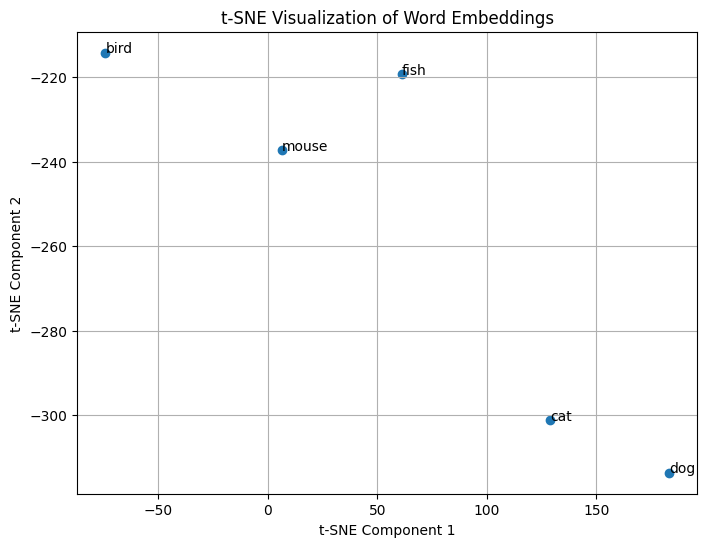

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Данные: эмбеддинги слов
words = ['dog', 'cat', 'fish', 'bird', 'mouse']
embeddings = np.array([
    [0.2, 0.1, 0.3],
    [0.3, 0.2, 0.4],
    [0.5, 0.3, 0.7],
    [0.9, 0.8, 0.2],
    [0.4, 0.5, 0.6]
])

# Применение t-SNE с исправленным значением perplexity
tsne = TSNE(n_components=2, perplexity=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# Визуализация
plt.figure(figsize=(8, 6))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]))

plt.title('t-SNE Visualization of Word Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid()
plt.show()

### Пример 2: Анализ предложений

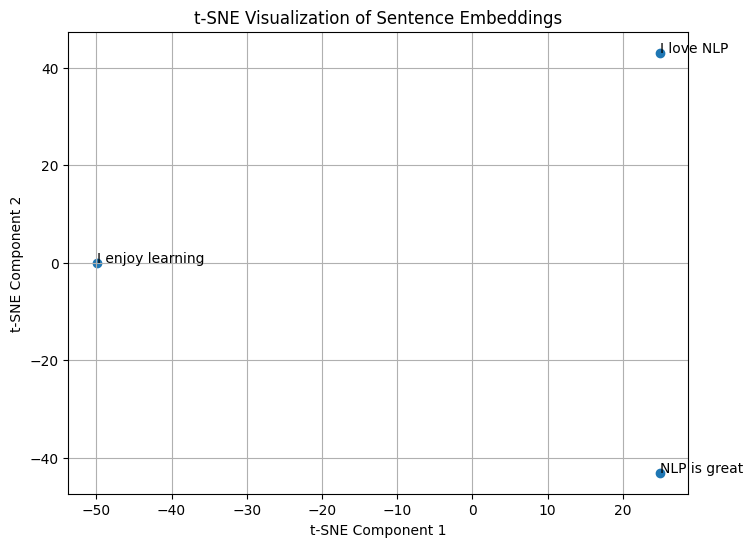

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Данные: эмбеддинги предложений
sentences = ["I love NLP", "NLP is great", "I enjoy learning"]
embeddings = np.array([
    [0.1, 0.2, 0.3, 0.4],
    [0.2, 0.1, 0.4, 0.3],
    [0.3, 0.4, 0.2, 0.1]
])

# Применение t-SNE с исправленным значением perplexity
tsne = TSNE(n_components=2, perplexity=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# Визуализация
plt.figure(figsize=(8, 6))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (embeddings_2d[i, 0], embeddings_2d[i, 1]))

plt.title('t-SNE Visualization of Sentence Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid()
plt.show()

## Вопросы для самопроверки
###1. PCA
1. Что такое метод главных компонент (PCA) и для чего он используется в обработке данных?
2. Какова основная идея PCA?
3. Как PCA помогает уменьшить размерность данных?
4. Объясните процесс центрирования данных в PCA.
5. Как вычисляется ковариационная матрица?
6. Что такое собственные значения и собственные векторы?
7. Как связаны собственные значения с важностью главных компонент?
8. В чем разница между полным и усеченным PCA?
9. Каковы основные предположения, которые делает PCA о данных?
10. Почему важно стандартизировать данные перед применением PCA?
11. Как интерпретировать результаты PCA?
12. Что такое проекция данных в контексте PCA?
13. Как определить количество главных компонент, которое следует оставить?
14. Приведите примеры приложений PCA в NLP.
15. Каковы ограничения метода главных компонент?





###2. SVD

1. Что такое сингулярное разложение матрицы (SVD)?
2. Каковы основные компоненты SVD (матрицы $U$, $\Sigma$, и $V^T$)?
3. Какое математическое выражение используется для представления SVD?
4. В чем разница между собственными числами и сингулярными числами?
5. Какая матрица отвечает за хранение сингулярных чисел в SVD?
6. Что представляют собой столбцы матрицы $U$ в сингулярном разложении?
7. Как связаны собственные значения матриц $A^T A$ и $A A^T$ с сингулярными числами?
8. Как можно использовать SVD для уменьшения размерности данных?
9. В каких случаях применение SVD полезно в задачах обработки естественного языка?
10. Как SVD помогает в латентно-семантическом анализе (LSA)?
11. Почему сингулярные числа ранжированы по убыванию?
12. Как можно приблизить матрицу, сохранив только несколько первых сингулярных чисел?
13. В чем отличие SVD от других методов разложения матриц, таких как LU-разложение или QR-разложение?
14. Какие задачи машинного обучения и NLP могут быть решены с помощью SVD?
15. Как сингулярное разложение может улучшить качество моделирования в задачах классификации текстов?


###3. LSA

1. Что такое **Latent Semantic Analysis (LSA)** и какова его основная цель в задачах обработки естественного языка (NLP)?
2. В чем заключается суть сингулярного разложения матрицы (SVD), и почему оно важно для LSA?
3. Как формируется матрица "термин-документ" в контексте LSA?
4. Объясните, что представляют собой матрицы $ U $, $ \Sigma $, $ V^T $ в разложении SVD.
5. Почему в LSA уменьшают размерность матрицы, и как это влияет на качество работы модели?
6. В чем отличие между SVD и PCA (Principal Component Analysis) с точки зрения их применения?
7. Какие метрики можно использовать для оценки качества снижения размерности в LSA?
8. Как выбор количества сингулярных значений $ k $ влияет на результаты LSA?
9. Как интерпретировать строки и столбцы в матрицах $ U $ и $ V^T $ после применения SVD?
10. В каких случаях LSA может быть недостаточно точен для задач анализа текста?
11. Какие преимущества дает использование LSA перед простыми методами мешка слов (Bag-of-Words)?
12. Как LSA справляется с проблемой полисемии и синонимии?
13. В чем основные ограничения LSA и как они могут быть устранены с помощью более современных методов?
14. Как взаимодействует матрица $ \Sigma $ с процессом снижения размерности и каково значение её элементов?
15. Объясните, почему в LSA можно использовать меньшее количество латентных компонент, и как это связано с латентными семантическими структурами текста?



###4. t-SNE

1. Что такое t-SNE, и как он используется в задачах обработки естественного языка (NLP)?
2. В чем заключается основное отличие t-SNE от других методов понижения размерности, таких как PCA или LDA?
3. Как рассчитывается евклидово расстояние между векторами слов в t-SNE?
4. Как вычисляются условные вероятности соседства между точками в t-SNE?
5. Какую роль играет гиперпараметр $\sigma$ в расчете вероятностей?
6. Что такое симметризация вероятностей, и почему она важна в t-SNE?
7. Что означает KL-дивергенция, и почему t-SNE минимизирует эту метрику?
8. Как t-SNE преобразует высокоразмерные данные в низкоразмерные?
9. Какие недостатки присущи методу t-SNE? Какие ограничения его использования в NLP?
10. Как влияет выбор гиперпараметра perplexity на результаты работы t-SNE?
11. Каковы типичные шаги применения t-SNE для визуализации векторов слов?
12. В чем различие между «высокоразмерными» и «низкоразмерными» представлениями точек в контексте t-SNE?
13. Почему важна нормализация данных перед применением t-SNE?
14. Как t-SNE помогает в анализе тематических моделей и кластеризации текстов?
15. В каких случаях t-SNE работает медленнее и менее эффективно, и какие альтернативы можно использовать?


## Задачи для самостоятельной работы
###1. PCA
1. Примените PCA к произвольному набору данных, содержащему два признака, и визуализируйте результаты.
2. Создайте трехмерный набор данных и примените PCA, чтобы уменьшить его до двумерного. Визуализируйте результаты.
3. Используйте набор данных о цветах Ирисов и выполните PCA, сохранив 95% дисперсии. Найдите количество главных компонент.
4. Постройте график Scree Plot для анализа собственных значений и выбора числа компонент.
5. Реализуйте PCA вручную, используя NumPy, на простом наборе данных из 5 наблюдений и 3 признаков.
6. Сравните производительность модели классификации (например, логистической регрессии) до и после применения PCA.
7. Проанализируйте, как разные масштабы признаков влияют на результаты PCA.
8. Примените PCA к двум наборам данных (например, "Iris" и "Wine") и сравните результаты.
9. Используйте PCA для визуализации высокоразмерных текстовых данных, преобразованных в TF-IDF.
10. Проведите анализ главных компонент на наборе данных MNIST (цифры) и визуализируйте 2D представление.
11. Используйте PCA для выявления скрытых паттернов в данных о продажах товаров.
12. Исследуйте влияние выбросов на результаты PCA, добавив несколько выбросов в набор данных.
13. Примените метод главных компонент к изображению (например, PNG) для уменьшения его размерности и сжатия.
14. Исследуйте, как PCA можно использовать для извлечения признаков в задачах кластеризации.
15. Примените PCA к произвольному набору данных и интерпретируйте первые три главные компоненты.
16. Исследуйте, как PCA может помочь в визуализации данных с большим количеством признаков.
17. Проведите анализ главных компонент на наборе данных о здоровье населения и выделите основные факторы здоровья.
18. Реализуйте PCA с помощью библиотеки scikit-learn и проанализируйте результаты.
19. Изучите, как можно использовать PCA для уменьшения размерности при работе с временными рядами.
20. Исследуйте альтернативные методы уменьшения размерности, такие как t-SNE и UMAP, и сравните их с PCA.
21. Примените PCA к данным о погоде для выявления основных паттернов и тенденций.
22. Используйте PCA для анализа результатов тестов студентов и выявления ключевых факторов успеха.
23. Примените PCA к набору данных о клиентах и выполните кластеризацию для сегментации клиентов.
24. Исследуйте влияние корреляции между признаками на результаты PCA.
25. Проведите PCA на данных о кредитных заявках и проанализируйте факторы риска.
26. Изучите, как PCA может быть использован для улучшения производительности алгоритмов машинного обучения.
27. Примените PCA к анализу социальных сетей, чтобы выявить скрытые связи между пользователями.
28. Используйте PCA для визуализации и анализа тональности текстов на разных языках.
29. Исследуйте, как PCA может быть использован в области финансов для анализа инвестиционных портфелей.
30. Примените PCA к набору данных о фильмах, чтобы выявить ключевые характеристики успешных фильмов.





###2. SVD

#### Часть 1: Практика вычисления и понимания SVD

1. Найдите SVD для следующей матрицы:
   $$
   A = \begin{pmatrix} 1 & 2 \\ 3 & 4 \end{pmatrix}
   $$
   Выведите все компоненты разложения $U$, $\Sigma$, и $V^T$.

2. Для матрицы:
   $$
   A = \begin{pmatrix} 1 & 1 \\ 0 & 1 \end{pmatrix}
   $$
   Вычислите сингулярное разложение и определите сингулярные числа.

3. Проведите сингулярное разложение для матрицы размером $3 \times 3$:
   $$
   A = \begin{pmatrix} 1 & 2 & 3 \\ 0 & 1 & 4 \\ 5 & 6 & 0 \end{pmatrix}
   $$

4. Сгенерируйте случайную матрицу размером $4 \times 4$ и выполните сингулярное разложение с помощью Python (NumPy).

5. Найдите сингулярные числа матрицы:
   $$
   A = \begin{pmatrix} 2 & 4 \\ 1 & 3 \end{pmatrix}
   $$
   и восстановите матрицу $A$ с помощью $U$, $\Sigma$, и $V^T$.

#### Часть 2: Применение SVD для уменьшения размерности

6. Для следующей термин-документной матрицы:
   $$
   A = \begin{pmatrix} 4 & 0 & 0 \\ 3 & 0 & 0 \\ 0 & 5 & 0 \\ 0 & 0 & 6 \end{pmatrix}
   $$
   выполните сингулярное разложение и оставьте только первые два сингулярных числа. Восстановите приближенную матрицу.

7. Сгенерируйте матрицу размером $5 \times 5$ и сохраните только первые два сингулярных числа. Какова разница между оригинальной и приближенной матрицей?

8. Выполните сингулярное разложение для следующей матрицы:
   $$
   A = \begin{pmatrix} 3 & 2 \\ 2 & 2 \\ 1 & 3 \end{pmatrix}
   $$
   Уменьшите размерность матрицы, сохранив только одно сингулярное число.

9. Постройте и визуализируйте зависимость между количеством сохранённых сингулярных чисел и точностью восстановления матрицы для случайной матрицы размером $10 \times 10$.

10. Используйте SVD для анализа следующей матрицы термов-документов и проведите уменьшение размерности до 2:
   $$
   A = \begin{pmatrix} 2 & 3 & 0 \\ 3 & 1 & 4 \\ 0 & 1 & 1 \end{pmatrix}
   $$

#### Часть 3: Применение SVD в NLP

11. Для следующей матрицы термов-документов:
   $$
   A = \begin{pmatrix} 1 & 0 & 2 \\ 0 & 1 & 1 \\ 1 & 1 & 0 \end{pmatrix}
   $$
   примените SVD и выполните латентно-семантический анализ (LSA).

12. Составьте термин-документную матрицу для 5 небольших предложений и примените к ней SVD. Найдите скрытые семантические структуры в данных.

13. Для коллекции текстов о спорте и технологиях составьте матрицу термов-документов и выполните уменьшение размерности с помощью SVD, сохранив 2-3 наиболее значимых компонента.

14. Постройте терм-документную матрицу из новостных заголовков (можно взять тексты в интернете) и примените SVD для уменьшения размерности. Определите основные латентные темы.

15. Для матрицы термов-документов, составленной из 4 документов (сохраняйте по 10-15 слов), выполните разложение и сравните документы по их латентным темам, используя косинусное сходство.

#### Часть 4: Теоретические задачи

16. Объясните, почему сингулярные числа ранжируются по убыванию. Как это влияет на приближение матрицы?

17. Докажите, что сингулярные числа всегда неотрицательные.

18. Почему при уменьшении размерности через SVD вектора остаются ортогональными? Докажите это свойство.

19. Найдите минимальное количество сингулярных чисел, необходимое для полного восстановления матрицы $A$ ранга 2.

20. Докажите, что сингулярные числа для симметричной матрицы совпадают с собственными числами.

#### Часть 5: Визуализация и интерпретация результатов

21. Сгенерируйте случайную матрицу размером $5 \times 5$ и визуализируйте изменение структуры матрицы при уменьшении сингулярных чисел с помощью тепловых карт (heatmap).

22. Сравните приближенную и исходную матрицы после уменьшения размерности через SVD на 3 компонента с помощью визуализации.

23. Постройте график зависимости точности восстановления матрицы от числа сохранённых сингулярных чисел для случайной матрицы размером $6 \times 6$.

24. Используя SVD, визуализируйте латентные темы в текстах, составленных на разные темы (например, спорт, наука, технологии).

25. Выполните SVD на матрице термов-документов, созданной на основе анализа отзывов о фильмах, и визуализируйте два латентных семантических измерения для каждого отзыва.

#### Часть 6: Применение в реальных данных

26. Скачайте данные о рецензиях на книги и составьте матрицу термов-документов. Выполните SVD и уменьшите размерность данных до 3-х компонент. Каковы основные латентные темы?

27. Используя корпус новостей, постройте терм-документную матрицу и примените SVD для нахождения 3 латентных тем.

28. Для реальных данных о музыкальных предпочтениях (например, Spotify, Last.fm), создайте матрицу пользователей и их предпочтений. Выполните разложение и найдите скрытые зависимости между пользователями и жанрами.

29. Скачайте данные о покупках клиентов (товары и количество покупок) и составьте матрицу. Выполните SVD и найдите основные латентные факторы покупательских предпочтений.

30. Для набора данных с текстовыми отзывами о ресторанах выполните разложение с помощью SVD и определите основные темы отзывов.



###3. LSA

#### Базовые задачи

1. Постройте матрицу "термин-документ" для пяти документов и четырех терминов, затем выполните SVD-разложение этой матрицы вручную.
2. Примените сингулярное разложение матрицы на небольшой выборке документов. Выберите три основных сингулярных значения и интерпретируйте результат.
3. Реализуйте LSA с использованием Python для матрицы размером $ 4 \times 5 $ и покажите, как снижается размерность.
4. Вручную выполните шаги SVD-разложения для матрицы размера $ 3 \times 3 $. Покажите, как происходит восстановление исходной матрицы.
5. Примените метод LSA к набору текстов, состоящих из 10 предложений. Определите наиболее значимые скрытые семантические темы.
6. Проведите SVD-разложение для произвольной матрицы термов и документов и визуализируйте результат на плоскости.
7. Рассчитайте косинусное сходство между двумя документами до и после снижения размерности с использованием LSA.
8. Постройте модель LSA для текстов, содержащих синонимичные слова, и проанализируйте, как модель объединяет такие слова.
9. Реализуйте LSA для двух различных наборов данных и сравните результаты для различных значений $ k $ (количество латентных компонент).
10. Примените LSA к матрице с большим количеством терминов и покажите, как уменьшается размерность для улучшения интерпретации текстов.

#### Задачи среднего уровня сложности

11. Используйте набор данных с новостями (например, набор данных "20 Newsgroups") и примените LSA для классификации текстов. Оцените качество классификации.
12. Напишите функцию на Python, которая применяет SVD к матрице и возвращает сниженную матрицу. Протестируйте её на матрице с 10 термами и 5 документами.
13. Реализуйте LSA на текстах, где один документ содержит сильно шумные данные. Проанализируйте, как LSA справляется с шумом.
14. Примените LSA к документам, которые содержат как технические, так и бытовые термины, и оцените, как модель разделяет эти темы.
15. Используя модель LSA, сравните два документа, написанных на разных языках, после их перевода. Как меняется их схожесть?
16. Постройте матрицу "термин-документ" на основе лемматизированных слов и оцените влияние этого подхода на результат LSA.
17. Напишите Python-скрипт для визуализации документов в двумерном пространстве после применения LSA на матрице термин-документ.
18. Проведите эксперимент с различными значениями порога для исключения редких и частых слов из матрицы "термин-документ". Как это влияет на результат LSA?
19. Реализуйте метод оценки качества снижения размерности в LSA на основе доли сохраненной информации от исходной матрицы.
20. Сравните результаты LSA и TF-IDF для одной и той же задачи поиска схожести документов. В каком случае модель более эффективна?

#### Продвинутые задачи

21. Реализуйте LSA на большом корпусе текстов и используйте полученные латентные компоненты для кластеризации документов.
22. Напишите Python-скрипт, который принимает на вход произвольную матрицу "термин-документ", выполняет SVD и строит 3D-визуализацию полученных данных.
23. Используя LSA, решите задачу тематического моделирования для набора из нескольких тысяч документов и визуализируйте результаты в виде облака тем.
24. Примените LSA для создания рекомендательной системы на основе схожести между документами. Оцените качество рекомендаций.
25. Разработайте систему поиска по текстам, в которой используется LSA для нахождения скрытых семантических связей между запросом и документами.
26. Реализуйте LSA с регуляризацией, чтобы учесть выбросы или шум в данных. Оцените, как это влияет на качество модели.
27. Сравните LSA с более сложными моделями (например, Latent Dirichlet Allocation) на задаче выделения тем из текстов.
28. Примените методику LSA к данным со многими редкими терминами. Какой минимальный порог отбора терминов обеспечивает лучшее качество снижения размерности?
29. Напишите Python-скрипт, который автоматически определяет оптимальное количество сингулярных значений для сохранения максимальной доли информации при снижении размерности.
30. Используйте LSA для решения задачи перевода документов между двумя языками с сильно различающимися словарями и оцените точность перевода.





###4. t-SNE

#### Визуализация векторов слов с t-SNE

1. Постройте векторы для 10 различных слов из выбранной вами области (например, спорт, еда) и примените t-SNE для понижения размерности. Постройте график, визуализирующий взаимосвязь между словами.
2. Возьмите набор эмбеддингов для 15 слов и вычислите евклидовы расстояния между всеми парами слов. Примените t-SNE для визуализации.
3. Используя набор векторов слов Word2Vec для 20 слов, выполните понижение размерности с помощью t-SNE и визуализируйте результаты на плоскости.
4. Для предложенного набора векторов предложений (эмбеддингов) выполните t-SNE для понижения размерности и создайте кластерную визуализацию.
5. Возьмите 30 наиболее часто встречающихся слов из любого текстового корпуса и визуализируйте их с использованием t-SNE.
6. Рассчитайте условные вероятности для 10 выбранных слов в t-SNE и выполните их симметризацию.
7. Примените t-SNE к случайному набору предложений и визуализируйте результаты. Проанализируйте, как предложения группируются.
8. Рассчитайте KL-дивергенцию для 5 пар векторов и объясните, как t-SNE минимизирует эту величину.
9. Измените гиперпараметр perplexity и повторите эксперимент с теми же векторами. Как изменится визуализация?
10. Используйте Word2Vec для построения векторов 20 слов и примените t-SNE для понижения размерности. Сравните результаты с PCA.

#### t-SNE для анализа предложений и текстов

11. Постройте векторы для предложений и примените t-SNE для кластеризации предложений по тематическим группам.
12. Возьмите небольшой текстовый корпус, выполните тематическое моделирование (например, LDA), затем примените t-SNE для визуализации тем.
13. Выполните t-SNE для предложений из разных тематических областей (например, новости, технологии, спорт) и визуализируйте результаты.
14. Используйте t-SNE для анализа эмбеддингов предложений, содержащих близкие по смыслу слова, и исследуйте группировку предложений.
15. Сформируйте набор текстов из разных категорий (например, научные статьи, блоги, новости), преобразуйте их в векторы и выполните t-SNE для визуализации.
16. Рассчитайте расстояния между предложениями в высокоразмерном пространстве и постройте t-SNE на основе этих расстояний.
17. Примените t-SNE к тематической модели (например, LDA), чтобы визуализировать, как документы распределяются по темам.
18. Исследуйте влияние количества слов в предложениях на результаты визуализации t-SNE.
19. Рассчитайте условные вероятности для группы предложений и выполните симметризацию вероятностей.
20. Выполните t-SNE на наборе новостных статей и объясните, какие группы и кластеры возникают в результате.

####  Применение t-SNE в реальных задачах NLP

21. Возьмите открытый текстовый корпус (например, новостные статьи) и выполните t-SNE для визуализации векторов слов. Какие закономерности можно наблюдать?
22. Используйте t-SNE для анализа текстов песен различных жанров и исследуйте, как они группируются на графике.
23. Выполните t-SNE для эмбеддингов слов, полученных из текстов на нескольких разных языках. Как выглядят результаты визуализации?
24. Примените t-SNE к анализу отзывов пользователей (например, из Yelp или Amazon) и визуализируйте их вектора.
25. Постройте векторы слов на основе частоты встречаемости биграмм и выполните t-SNE для понижения размерности.
26. Примените t-SNE к данным о диалогах из чатов и исследуйте, как предложения группируются по тематике.
27. Возьмите набор новостных статей с разных новостных сайтов и примените t-SNE для визуализации их векторов.
28. Выполните t-SNE для векторов предложений, содержащих неологизмы, и визуализируйте, как они распределяются относительно известных слов.
29. Используйте t-SNE для визуализации эмбеддингов текстов из социальных сетей (например, Twitter), чтобы выявить возможные кластеры.
30. Примените t-SNE к анализу векторов слов из различных профессиональных сфер (медицина, IT, финансы) и визуализируйте результаты.
